# Регрессионный анализ

**Задача:** написать программу, которая бы подбирала наилучшую модель, описывающую входную функцию

**Выполнила:** Антропова Ольга

# Описание работы программы

**Используемые библиотеки**
- random
- numpy
- math
- matplotlib.pyplot
- sklearn (linear_model, preprocessing, metrics)

### Генерация данных 

C помощью функции `func` мы задаем уравнение, которое мы хотим описать с помощью модели.

Пример оформления уравнения для линейной функции: 
```
def func_exp(x, a, b, c):
    return a*np.exp(b*x)+c
```

В любом наборе данных присутствует шум - это обясняется тем, что внешние неконтролируемые переменные и/или ошибки влияют на распределение измерений.

Для реалистичности наших сгенерированных данных создадим функцию, которая будет случайным образом немного искажать значение зависимой переменной путем прибавления случайного числа из нормального (гауссовского) распределения.

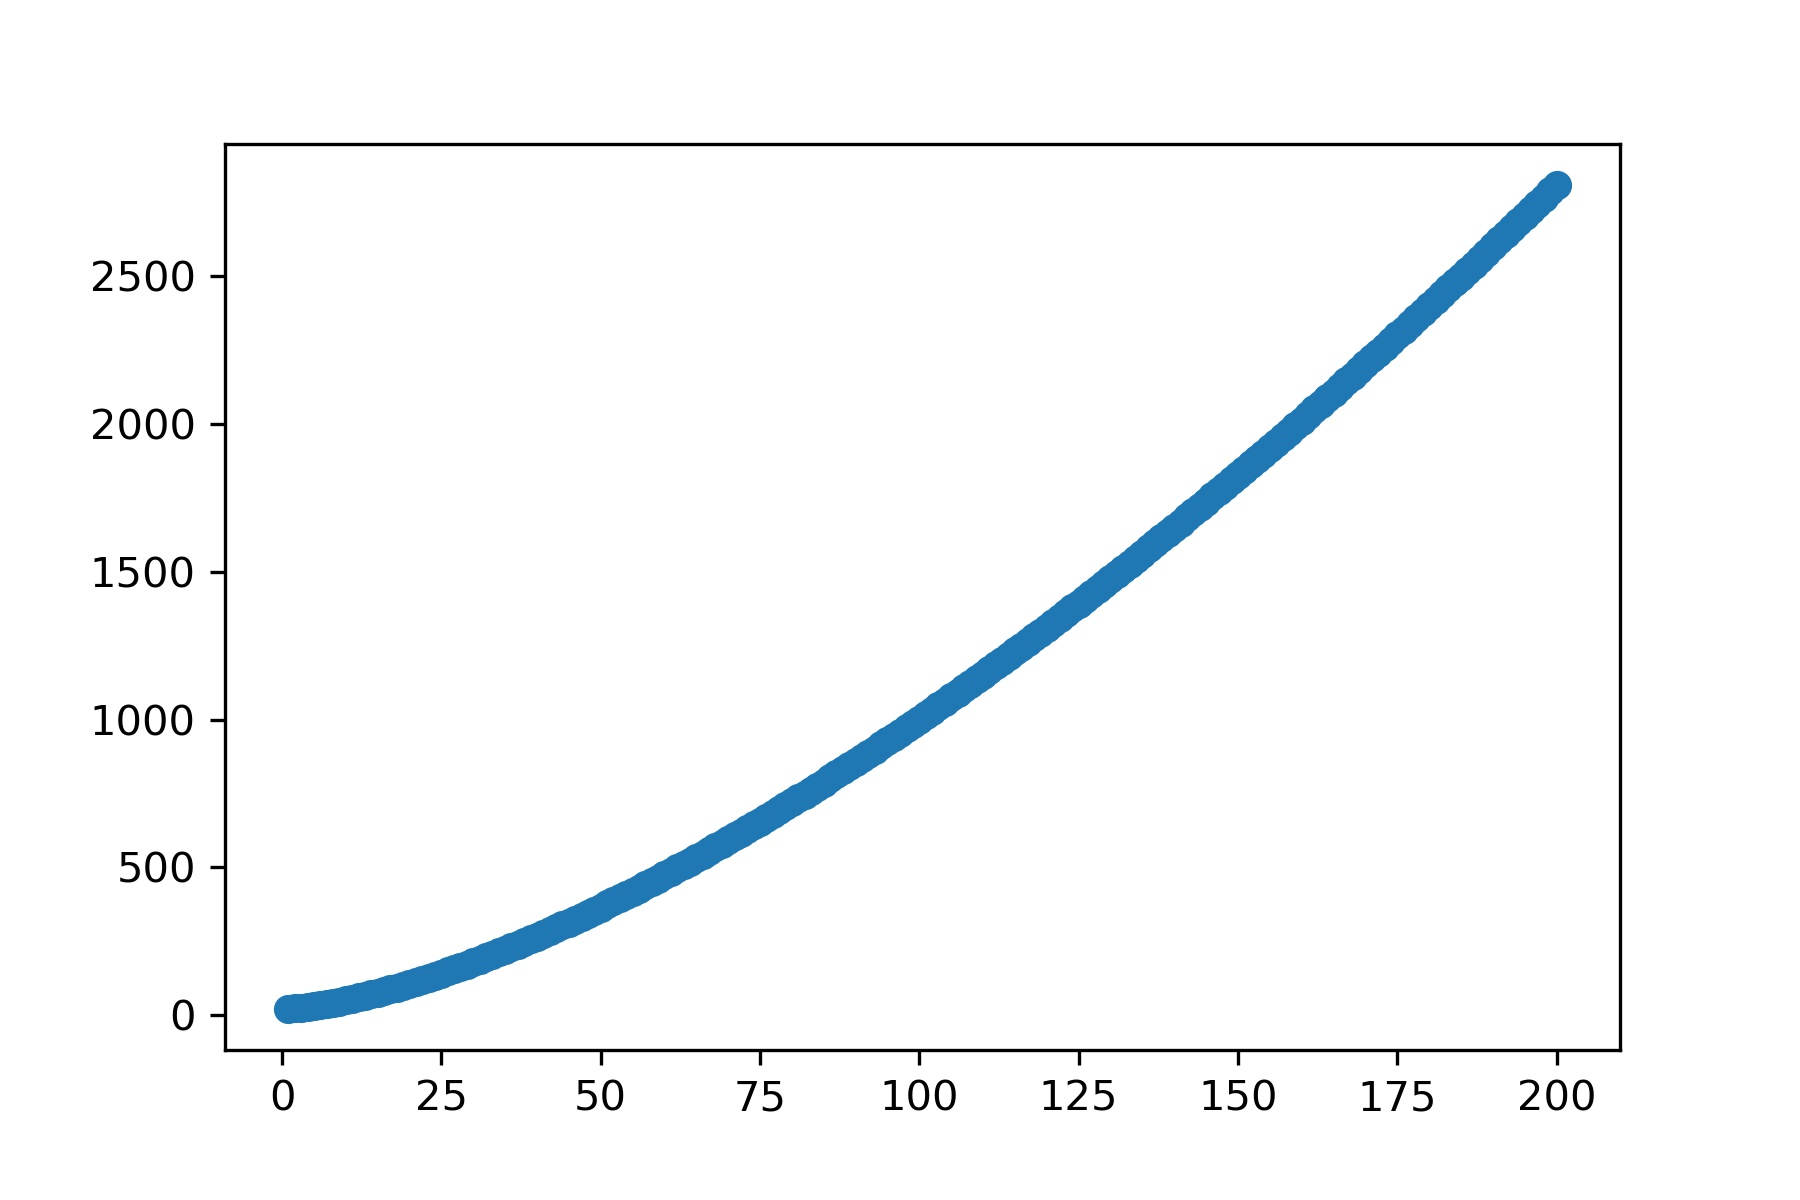

Сгенерированные данные без шума.

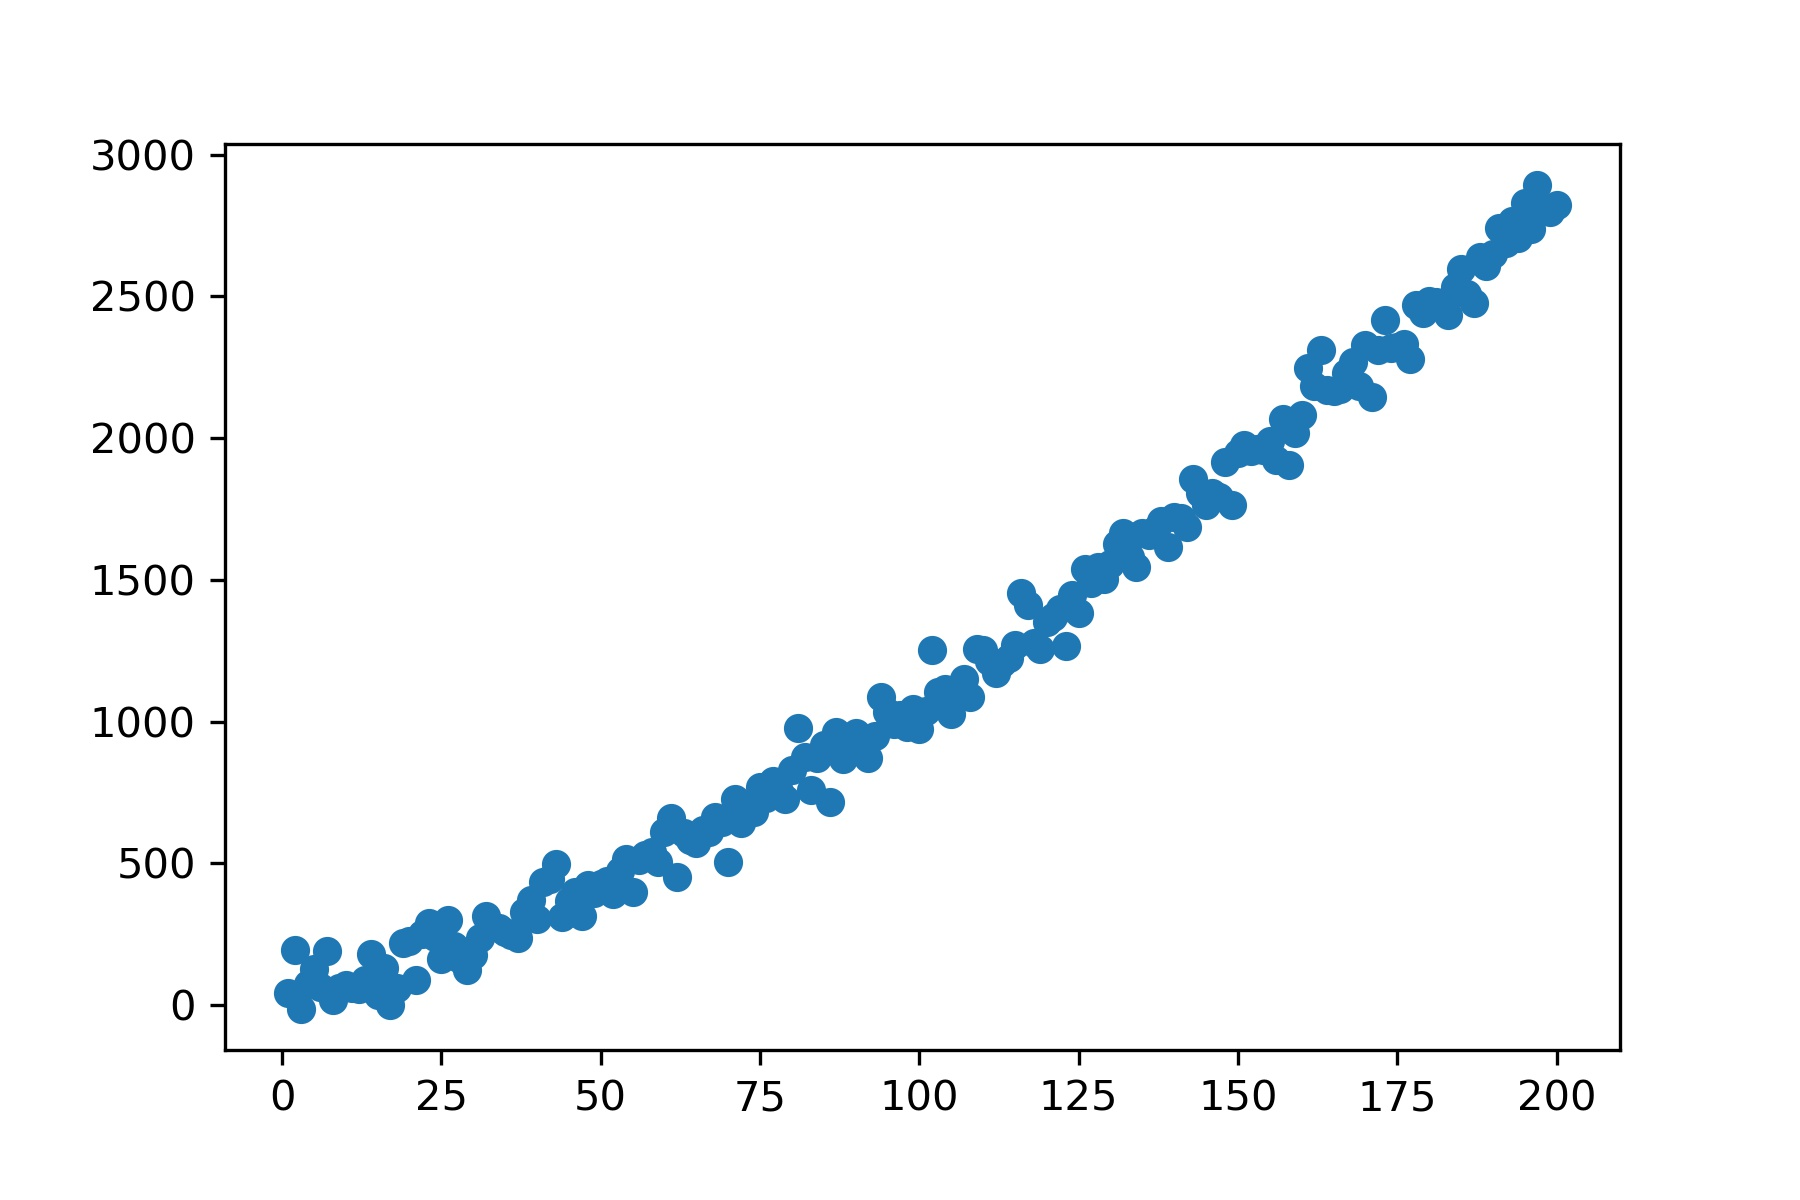

Генерация данные с шумом.

### Линейная регрессия

Для создания линейной регрессии используем соответствующую модель из библиотеки `sklearn`.

Сначала создаем объект класса линейной регрессии, обучаем его на нашей выборке, затем сохраняем предсказанные значения для дальнейшего сравнения с результатами других моделей.

```
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(x, y)
y_lin_fit = lin_reg.predict(x_fit)
linear_r2 = r2_score(y, lin_reg.predict(x))
```

### Полиномиальная регрессия

Для ее создания использовалась та же самая библиотека `sklearn`. 

Используем созданную для линейной регрессии модель, только теперь обучаем ее на полиномиально преобразованных данных (х). 

Для сравнения будем обучать сразу несколько полиномов разной степени: 2, 3, 4 и 5. 

Пример обучения модели полиномиальной регрессии второй степени. Остальные модели более высокой степени реализуются аналогично с единственной разницей в указании степени.
```
quadratic = PolynomialFeatures(degree=2)
x_quad = quadratic.fit_transform(x)
lin_reg = lin_reg.fit(x_quad, y)
y_quad_fit = lin_reg.predict(quadratic.fit_transform(x_fit))
quadratic_r2 = r2_score(y, lin_reg.predict(x_quad))
```

### Экспоненциальная регрессия

Для того, чтобы осуществить подгонку экспоненциальной функции к нашей исходной, проведем линеаризацию экспоненциальной функции. Для этого вновь преобразуем данные, но на этот раз уже не координаты по х, а по у. Преобразовываем с помощью логарифма: каждое значение, которое мы получили из исходной функции путем подстановки значения х, мы логарифмируем. Затем так же, как и в случае с полиномиальной регрессией, обучаем линейную модель на полученных данных.

Единственное отличие от расчета нашей метрики для сравнения будет в том, что сравниваться будут не просто исходные значения у и предсказанные моделью, а исходные значения и экспонента в степени, равной предсказанному значению.

```
transformer = FunctionTransformer(np.log, validate=True)
y_trans = transformer.fit_transform(y)
regressor = LinearRegression()
results = regressor.fit(x, y_trans)
y_fit = results.predict(x)
exp_r2 = r2_score(y, np.exp(results.predict(x)))
```

### Оценка работы моделей

Для оценки точности предсказания используем коэффициент детеминации.

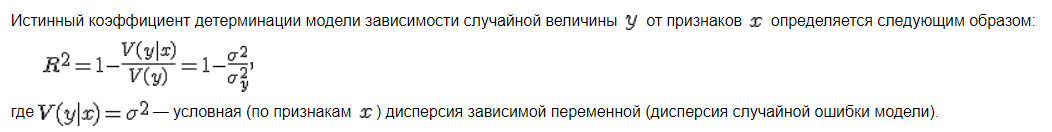

Коэффициент детерминации - доля дисперсии зависимой переменной, объясняемой моделью зависимости, то есть объясняющими переменными. Другими словами, он показывает, насколько точно созданная нами модель описывает нашу функцию. С помощью него мы и будем выбирать подходящую модель для данных.

Для каждой модели находим коэффициент детерминации с помощью функции `r2_score` библиотеки `sklearn`.

Пример определения коэффициента детерминации для экспоненциальной регрессии:
```
exp_r2 = r2_score(y, np.exp(results.predict(x)))
```

Для лучшей визуализации работы моделей создадим графики, на которых изобразим наши имеющиеся данные и кривые, созданные моделями, которые должны описывать наши данные.

# Результаты работы программы

### Линейная функция

Для определения линейной функции возьмем следующее уравнение: y=x - 0.2x + 50.
Уровень шума в данных установим равным 15. Получаем следующий набор данных:

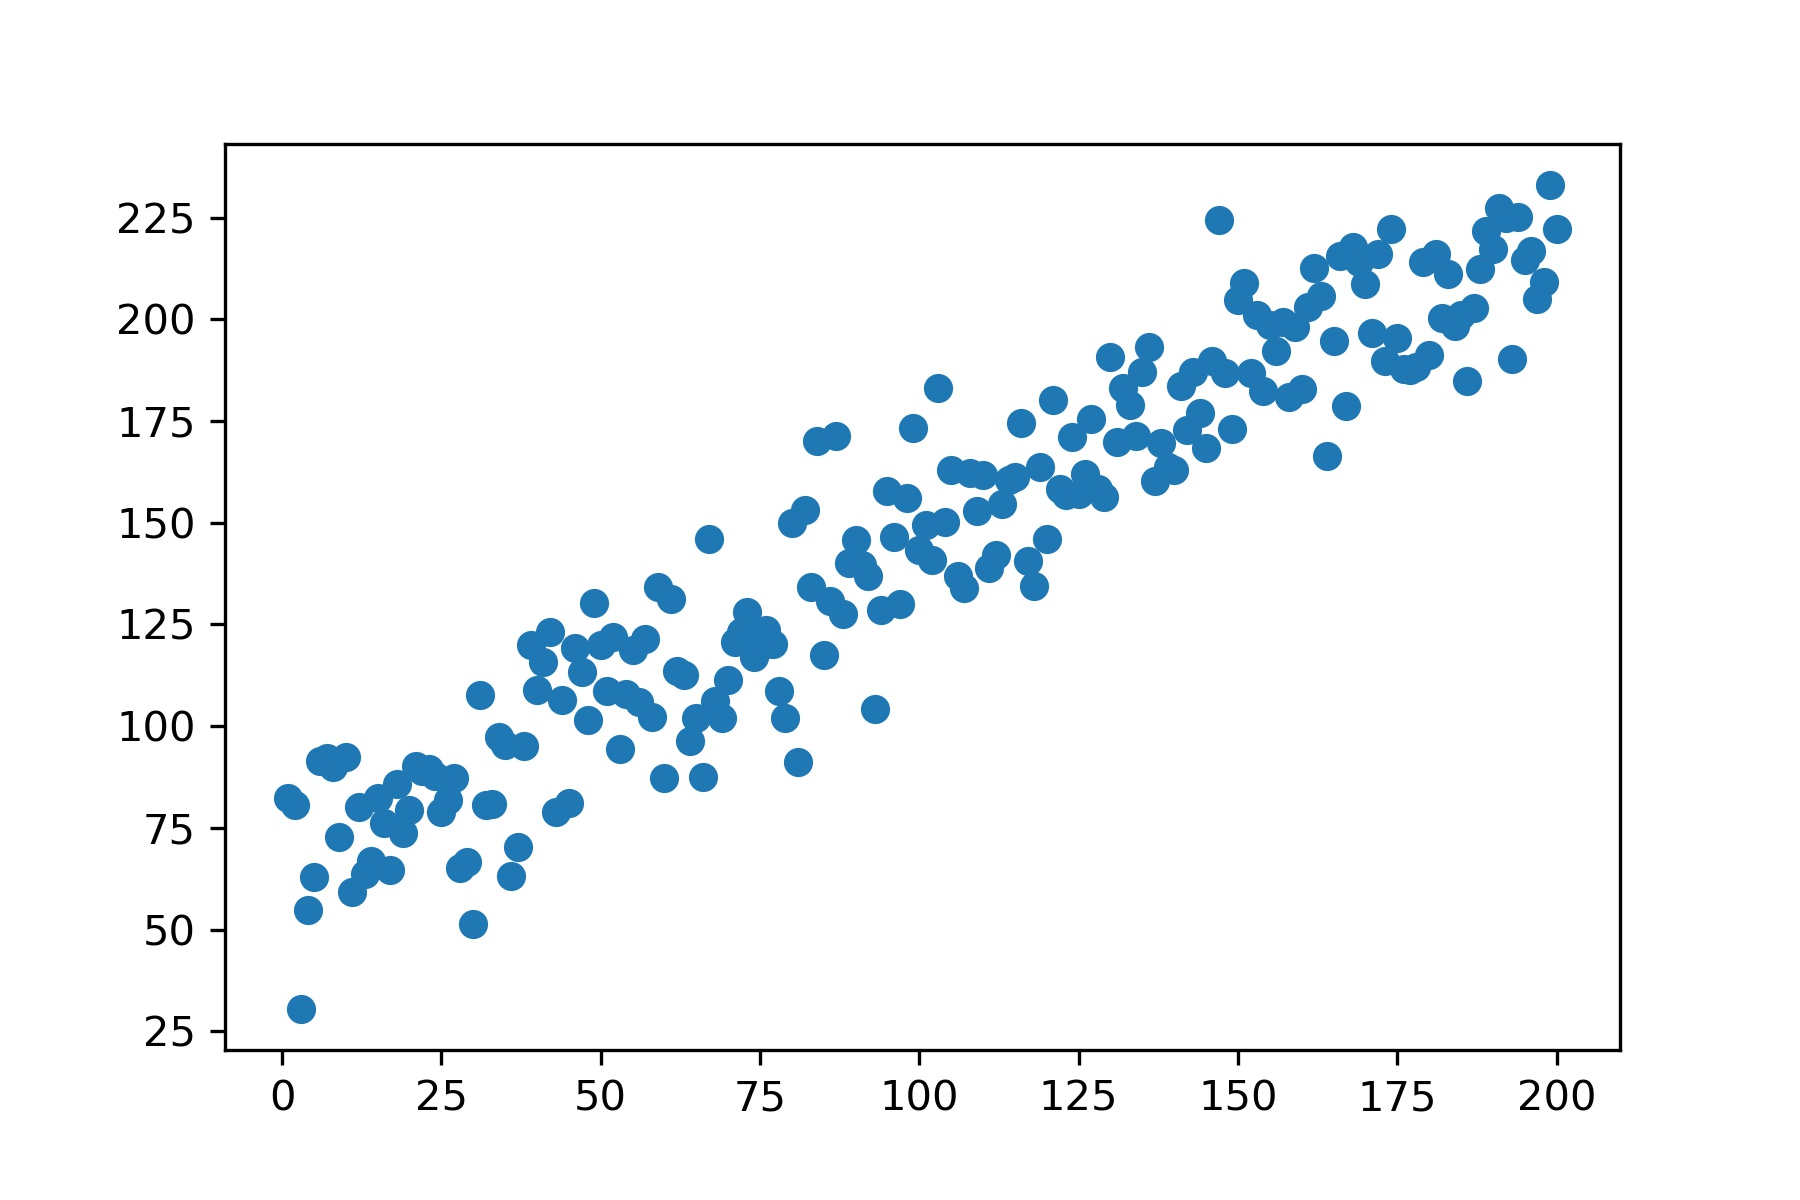

График для линейной регрессии:

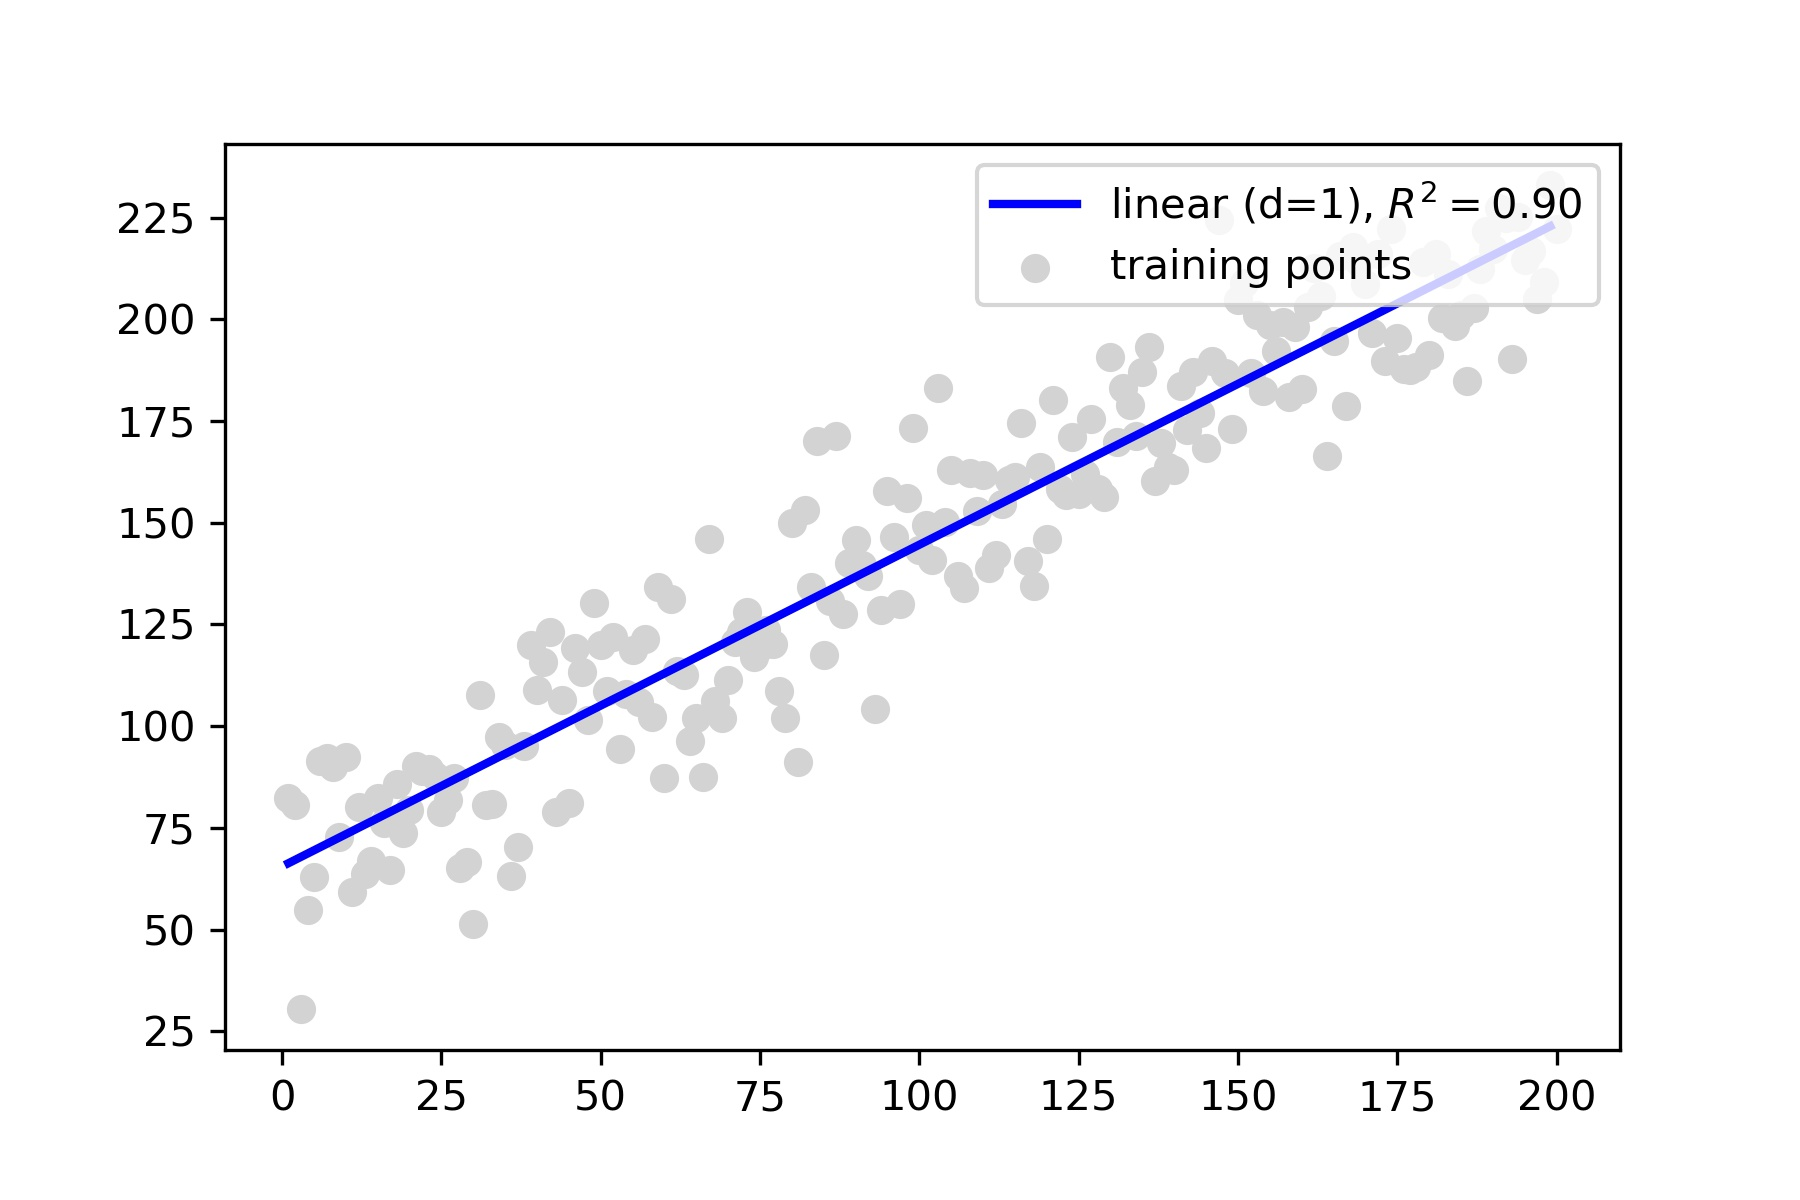

Польномиальные регрессии всех степеней показали один и тот же результат:

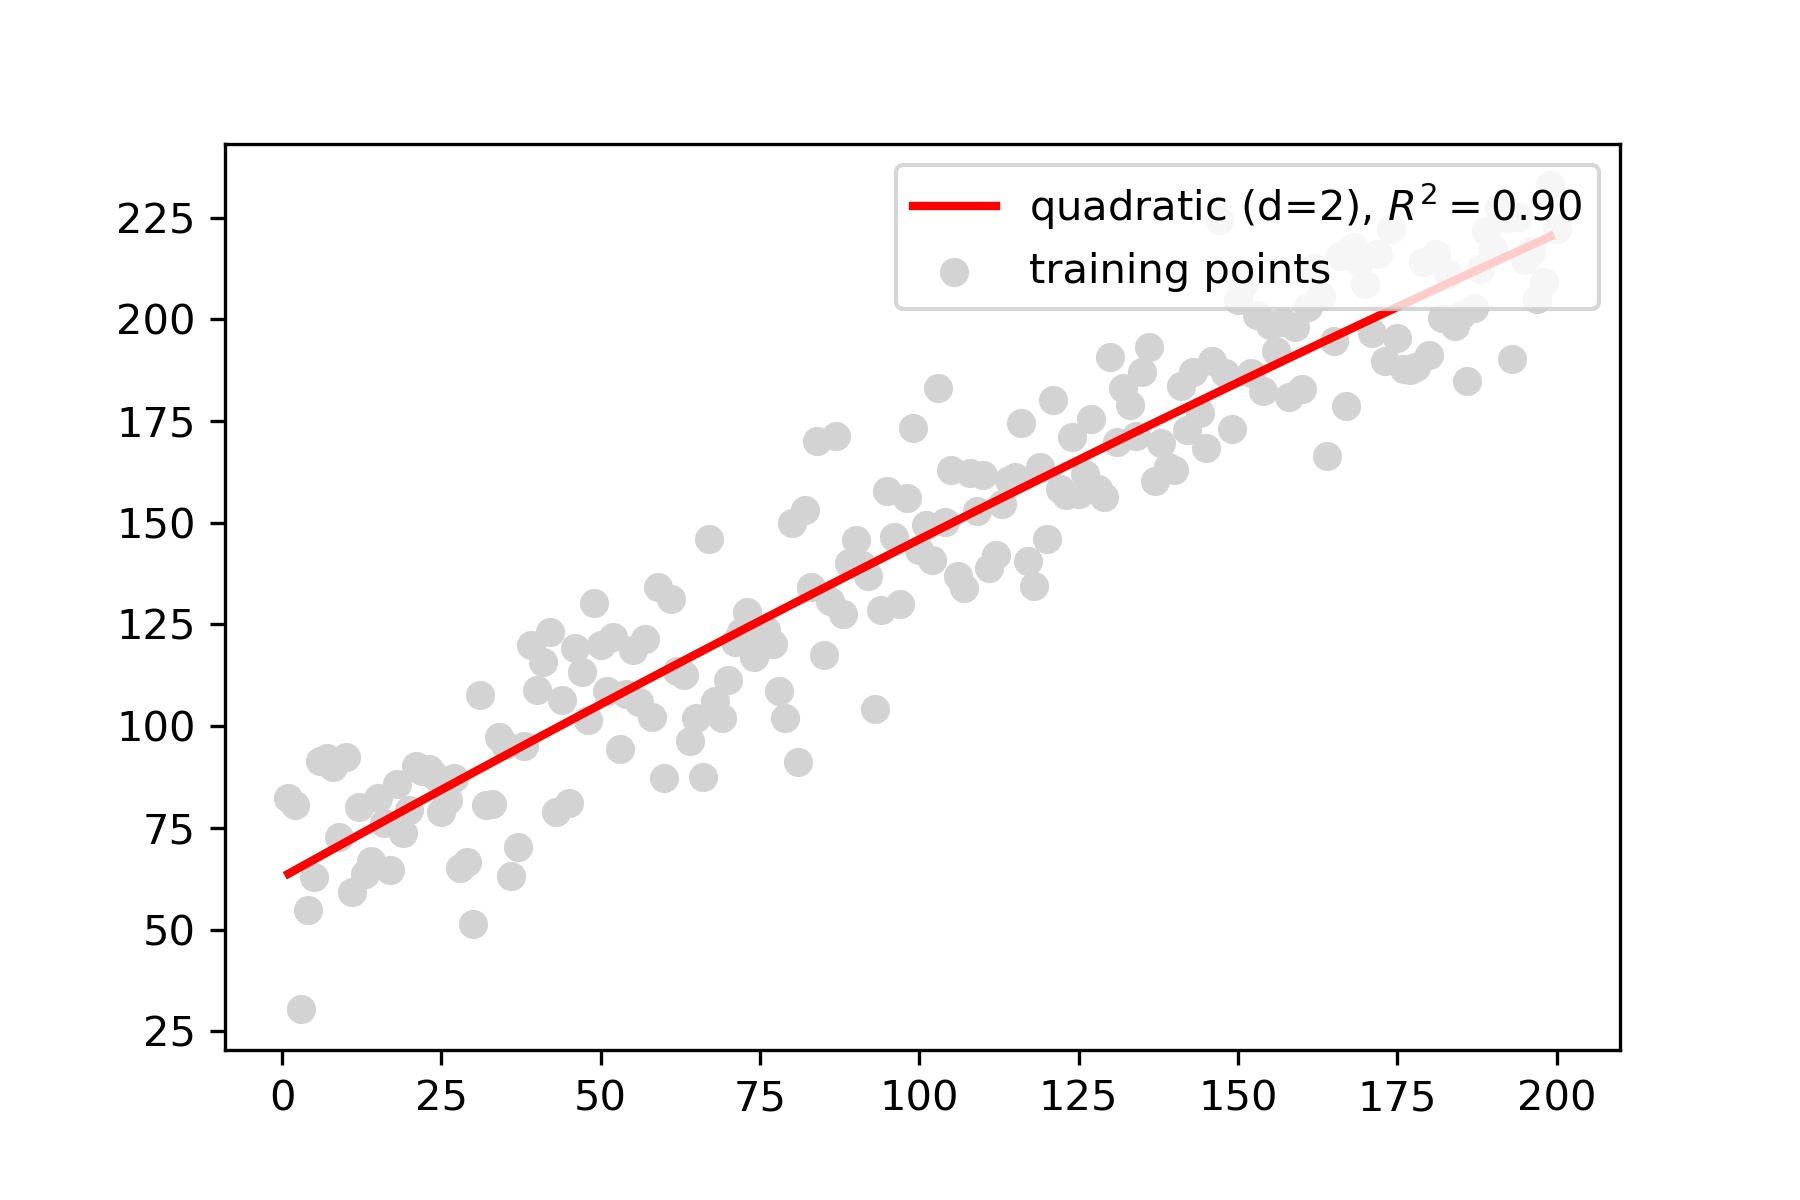

График работы экспоненциальной регрессии: 

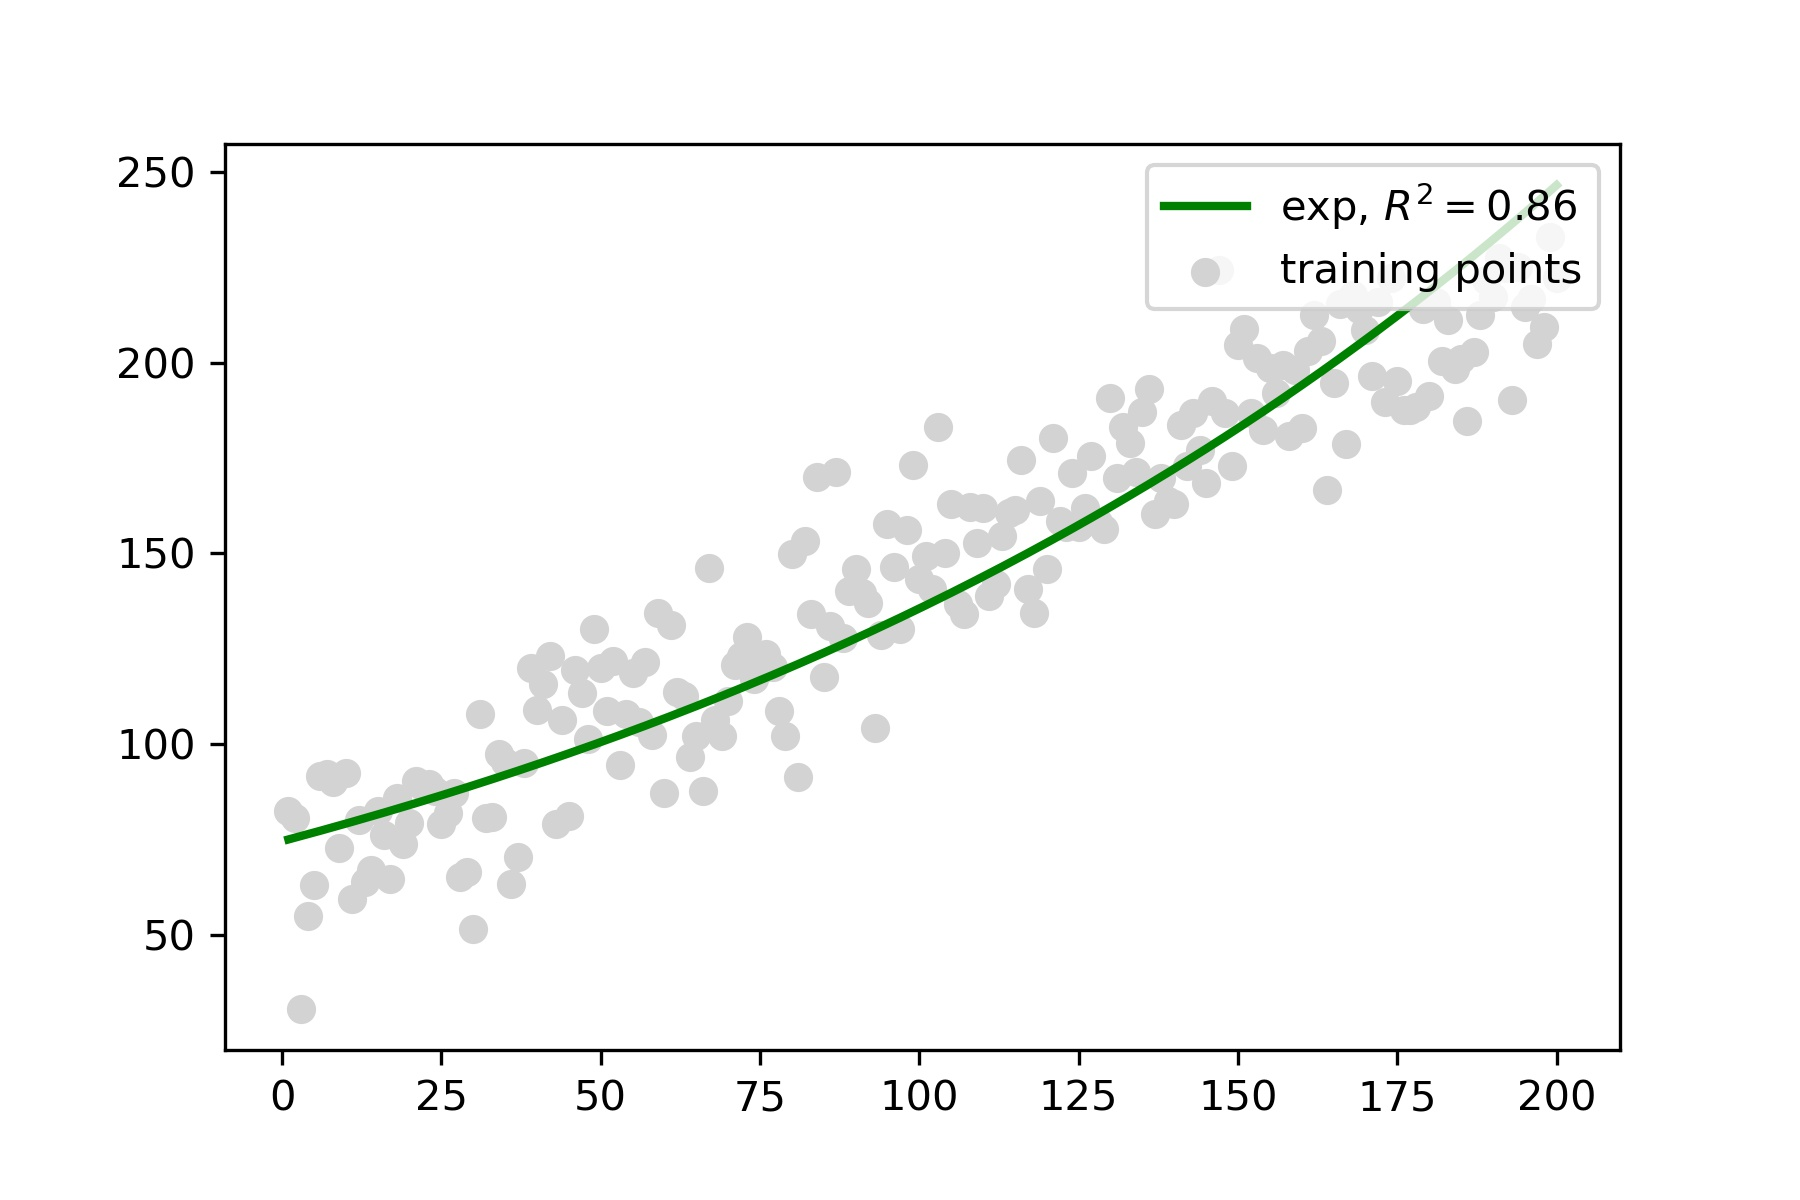

Итого получаем: 

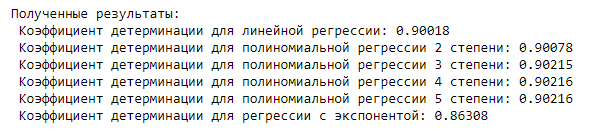

Как мы видим, результаты работы обычной линейной регрессии и регрессии, обученной на полиномиально преобразованных данных отличаются несущественно, а значит, одинаково хорошо справляются с описанием множества точек. Реализовать линейную функцию легче, чем с полиномиальными образованиями, а значит, считаем, что рациональнее всего использовать в данном случае линейную регрессию.

### Кубическая функция

Задается следующим уравнением: x^3 - x^2 + 1 000 002.

Уровень зашумленности данных: 100 000.


Полученный график:

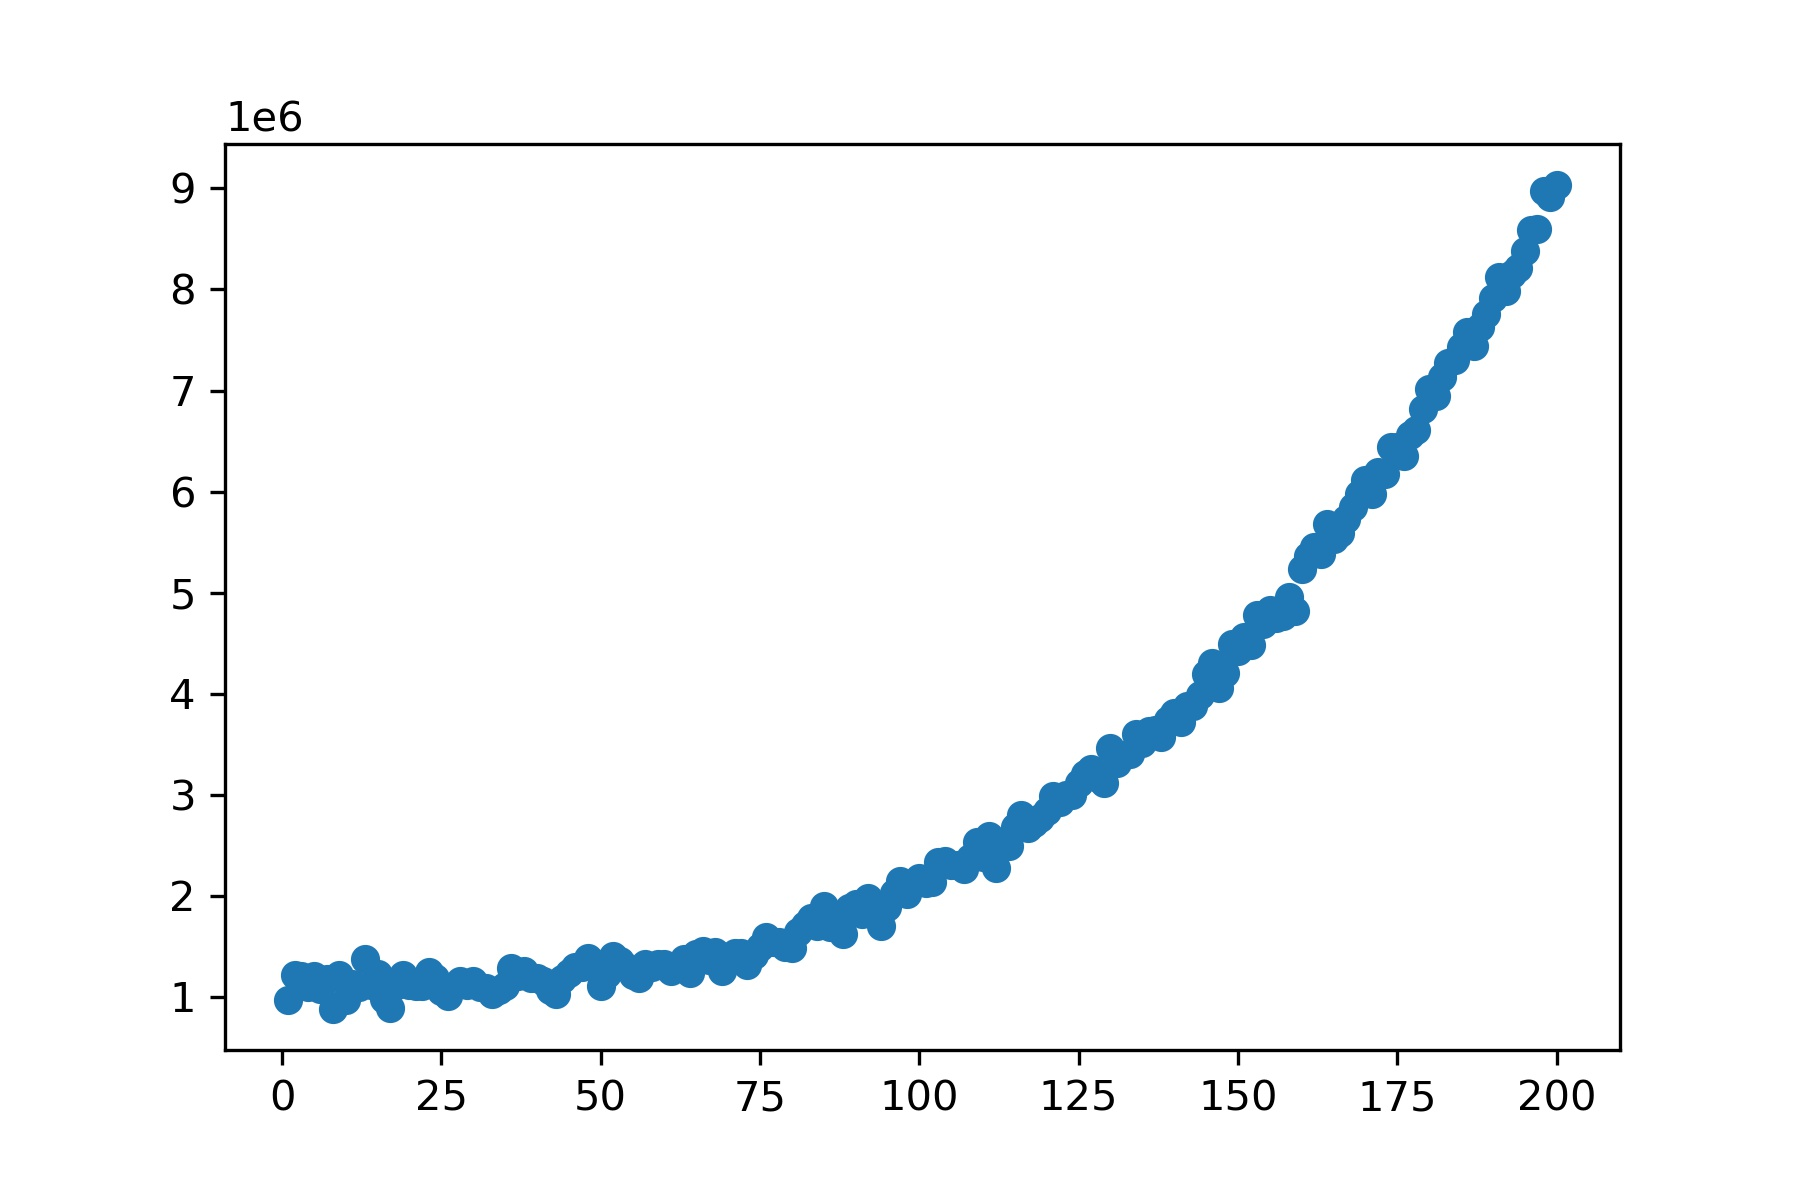

Регрессии с полиномиальными преобразованиями показали схожий результат - в пределах значения коэффициента детерминации от 0,99 до 1,00.

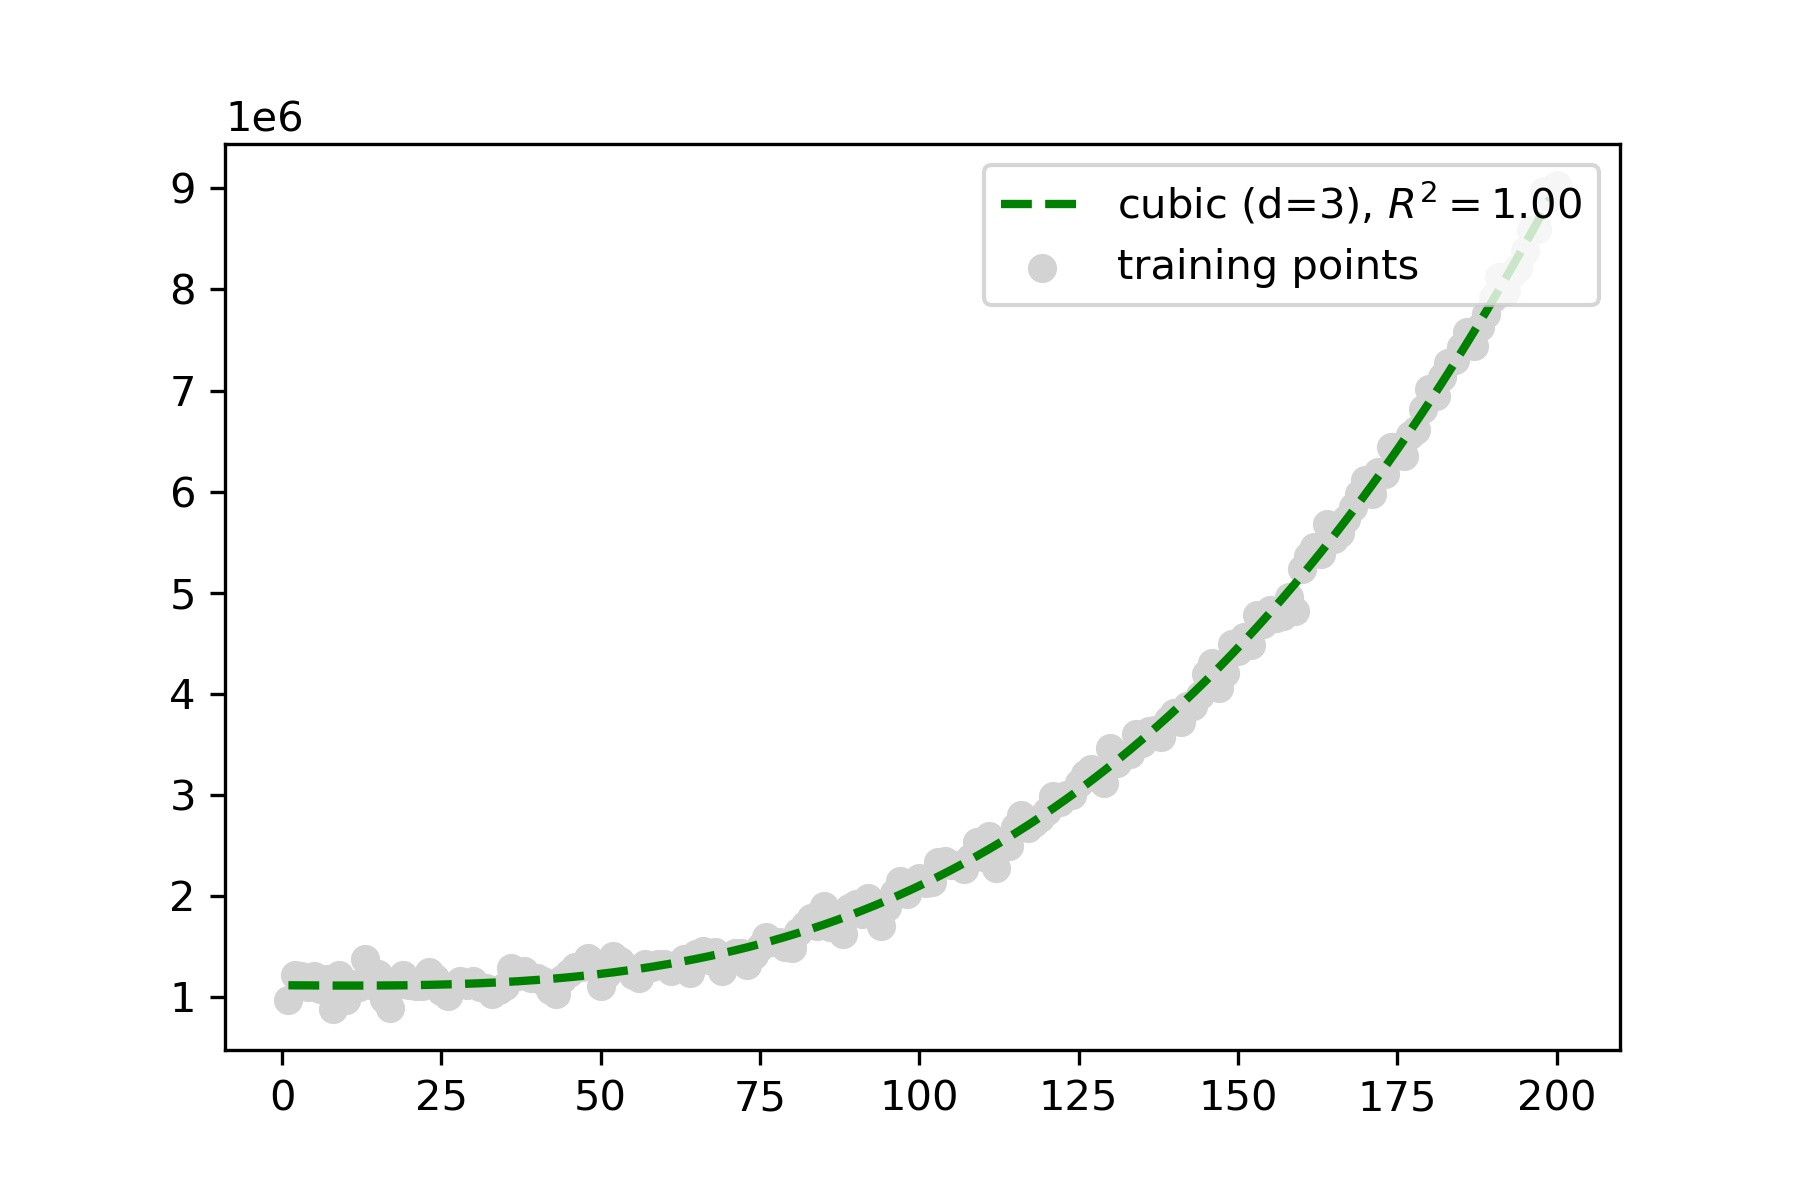

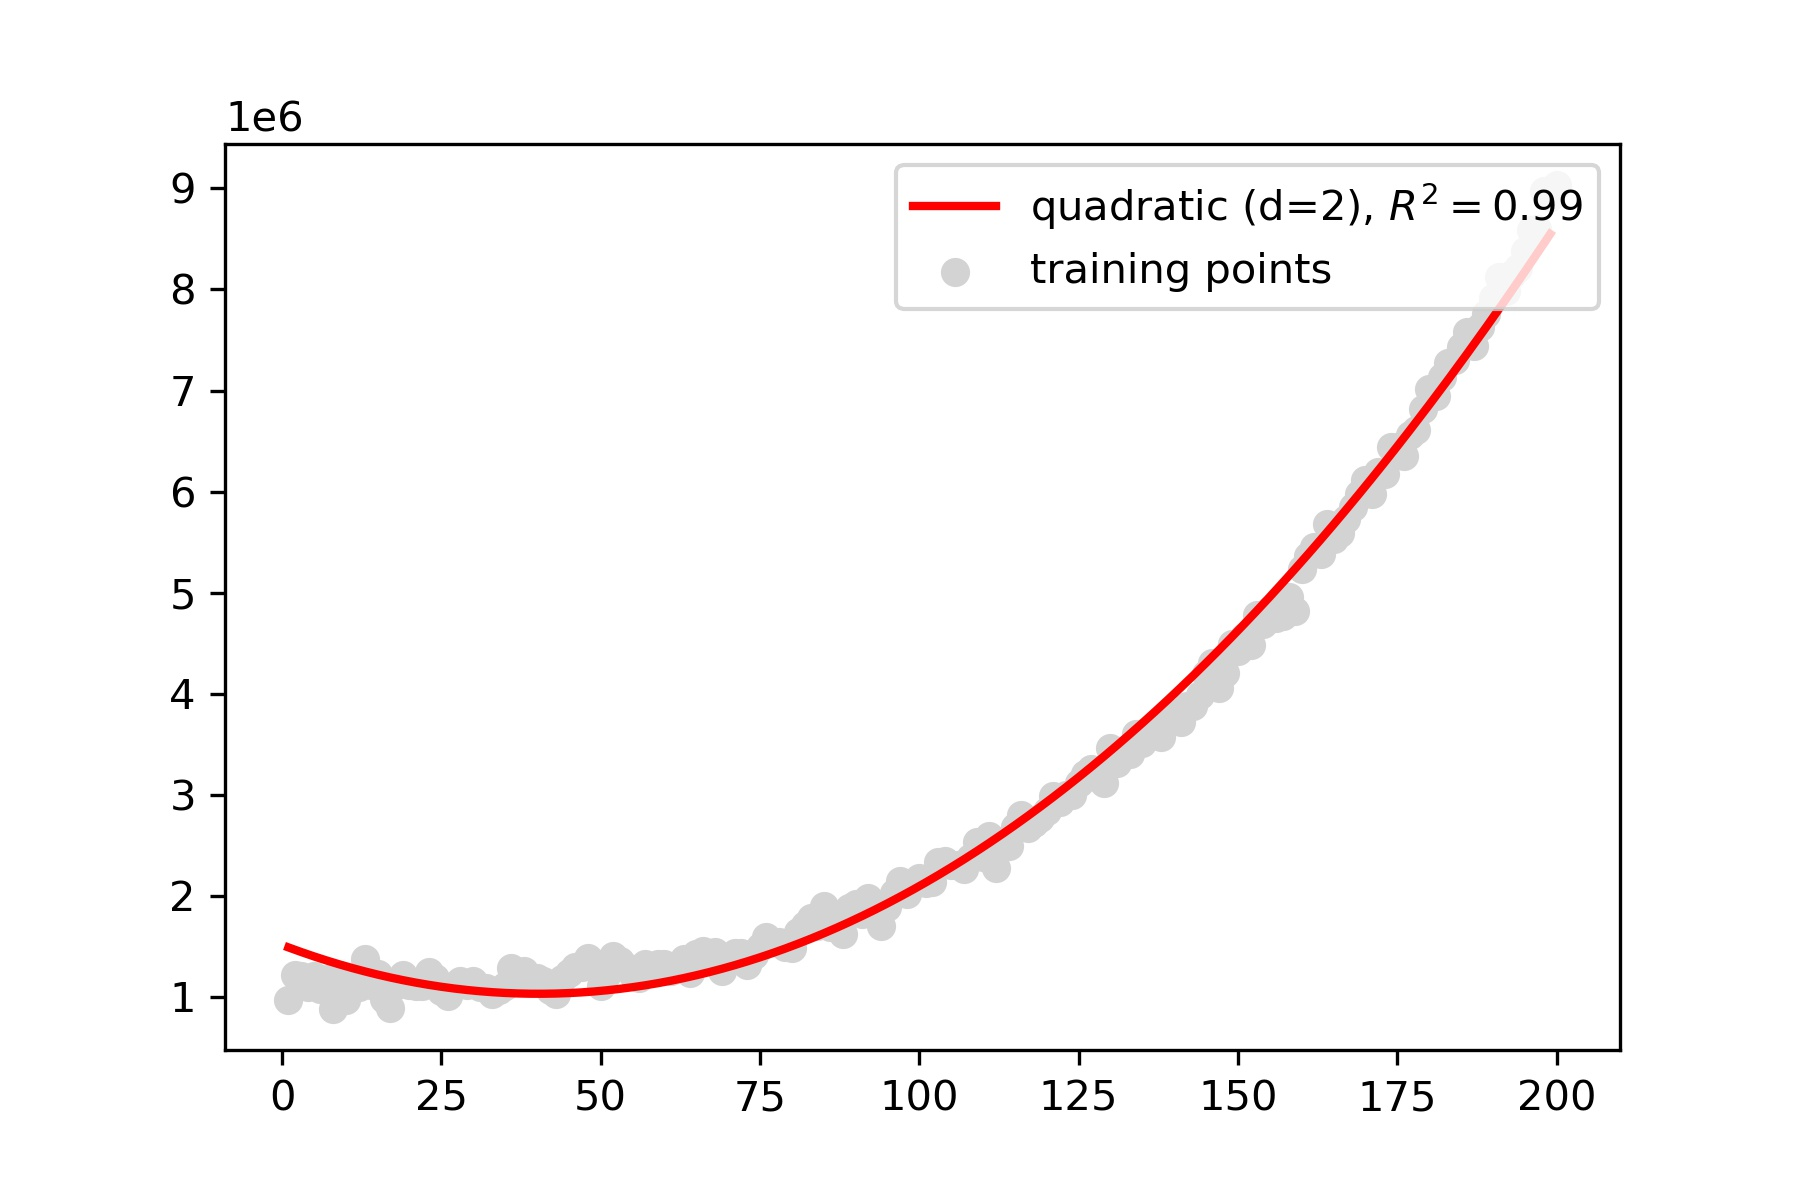

Линейная регрессия:

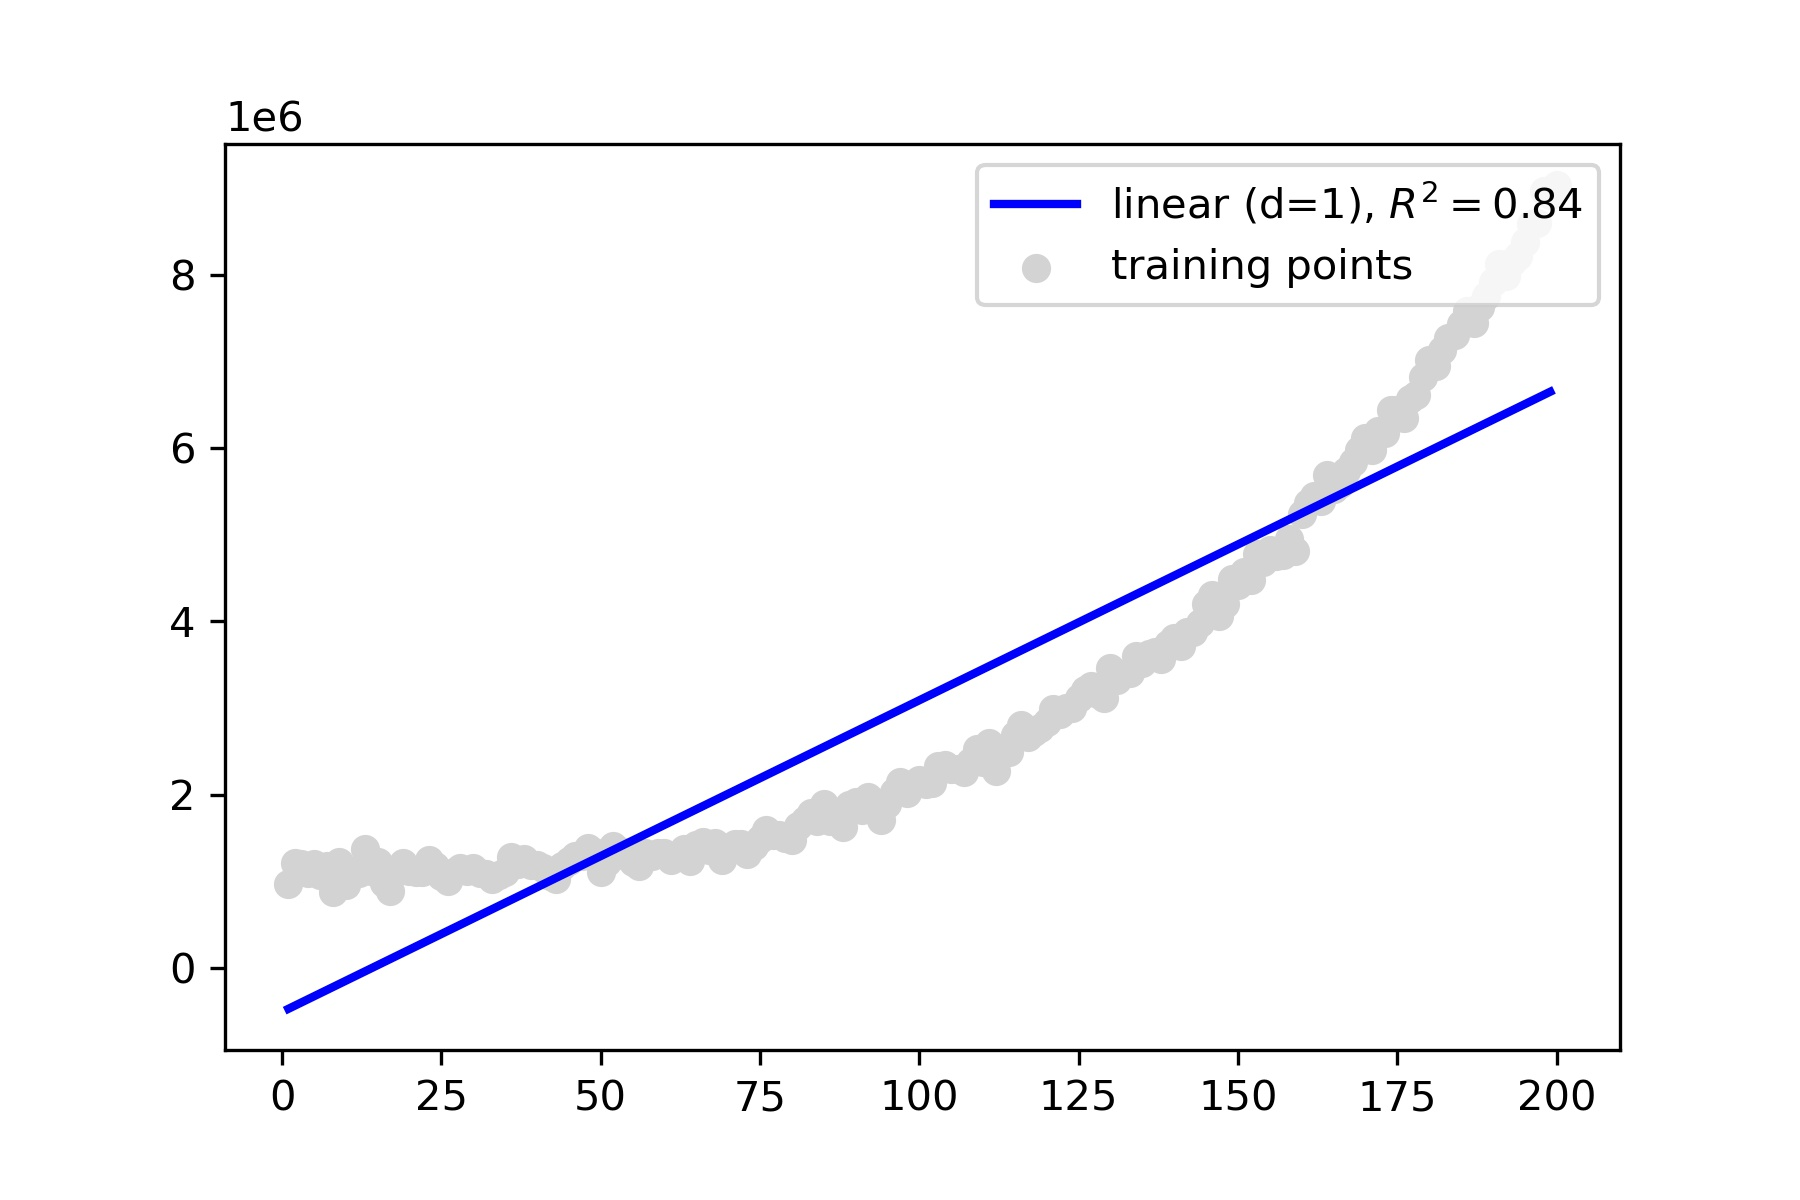

Экспонента:

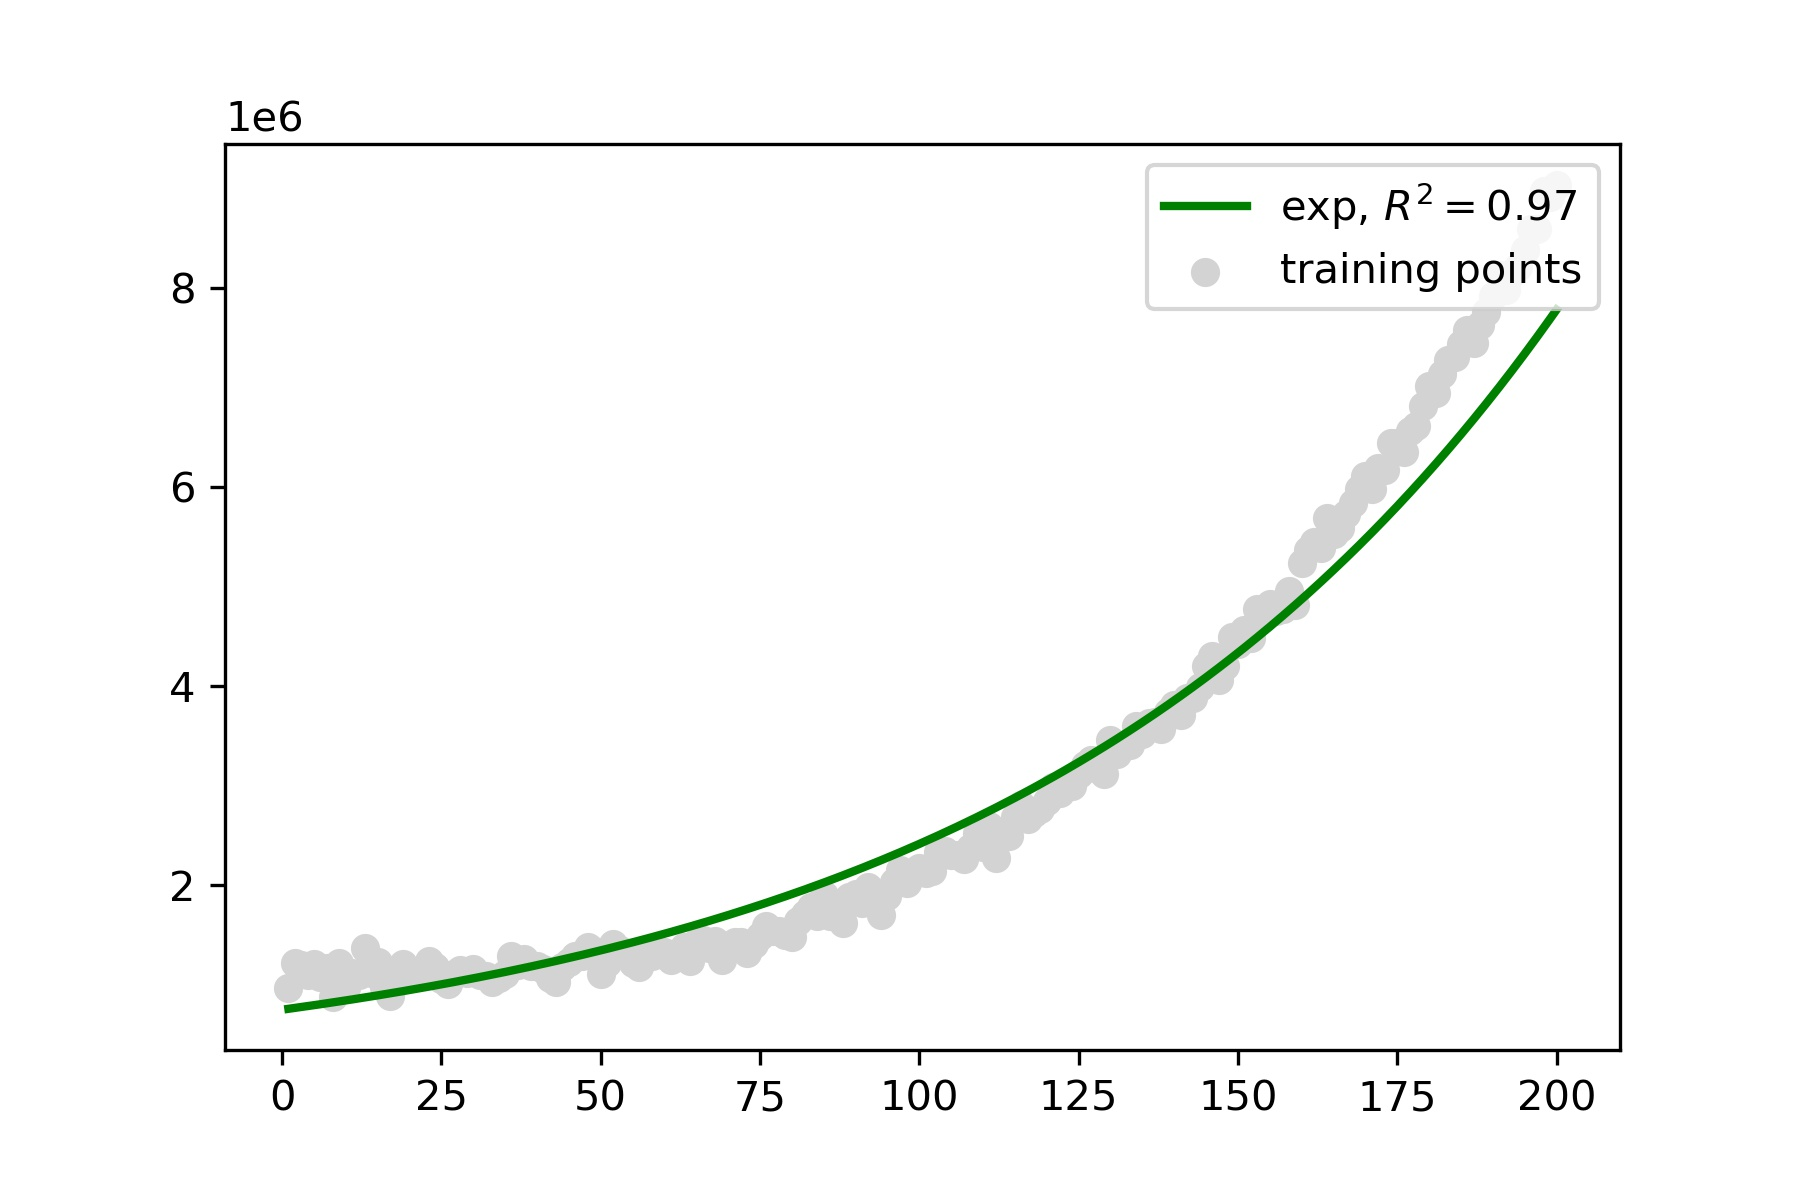

Соберем вместе полученные результаты:

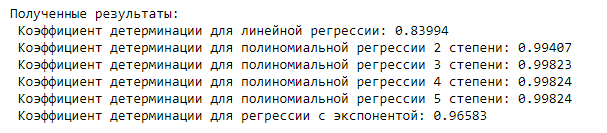

Можем сделать вывод, что оптимальный результат получает регрессия с полиномиальными (третьей степени) преобразованиями данных. Модели более высокой степени показывают сопоставимый результат, а значит берем более простую из них.

### Экспоненциальная функция

Уравнение для экспоненциальной функции: 1.7*e^(0.27*x) + 310.

Уровень шума в наших данных для функции generate_data = 500.

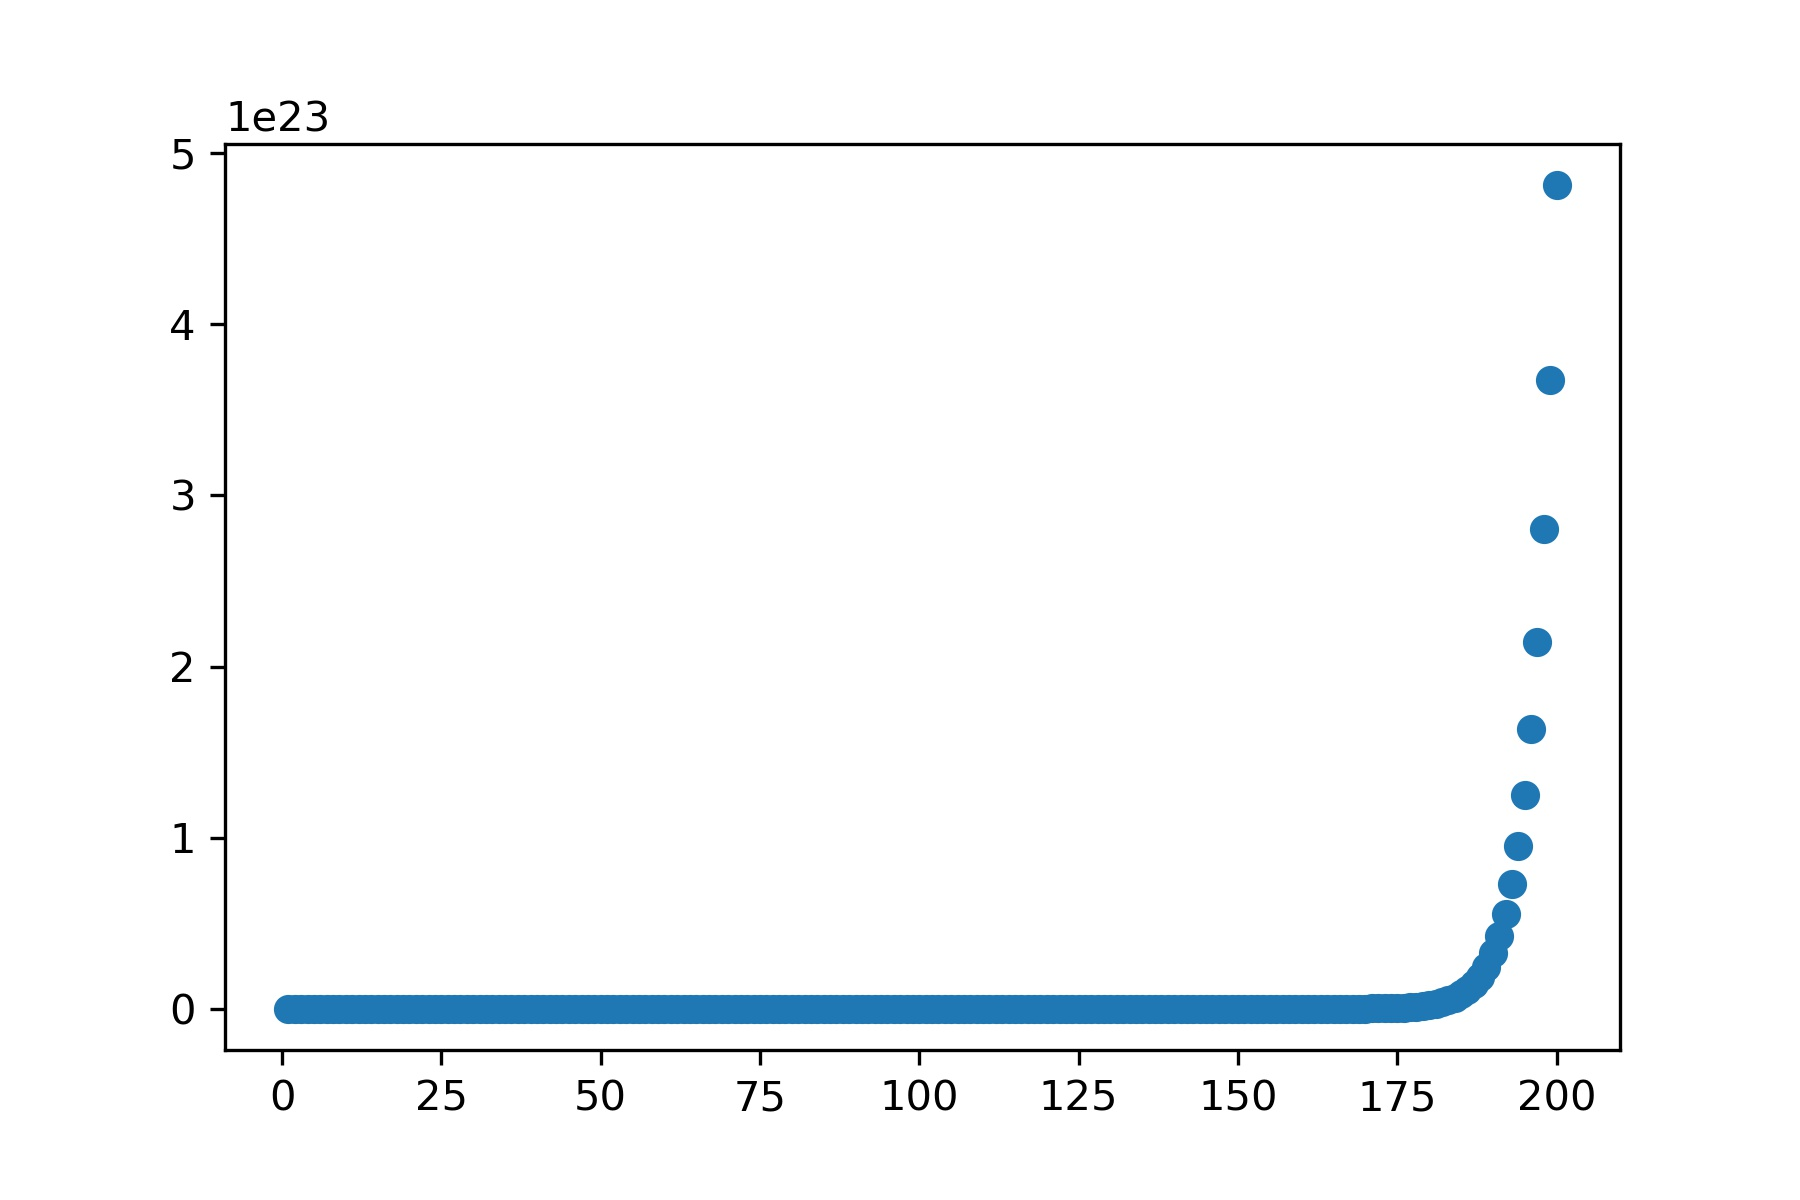

Линейная регрессия:

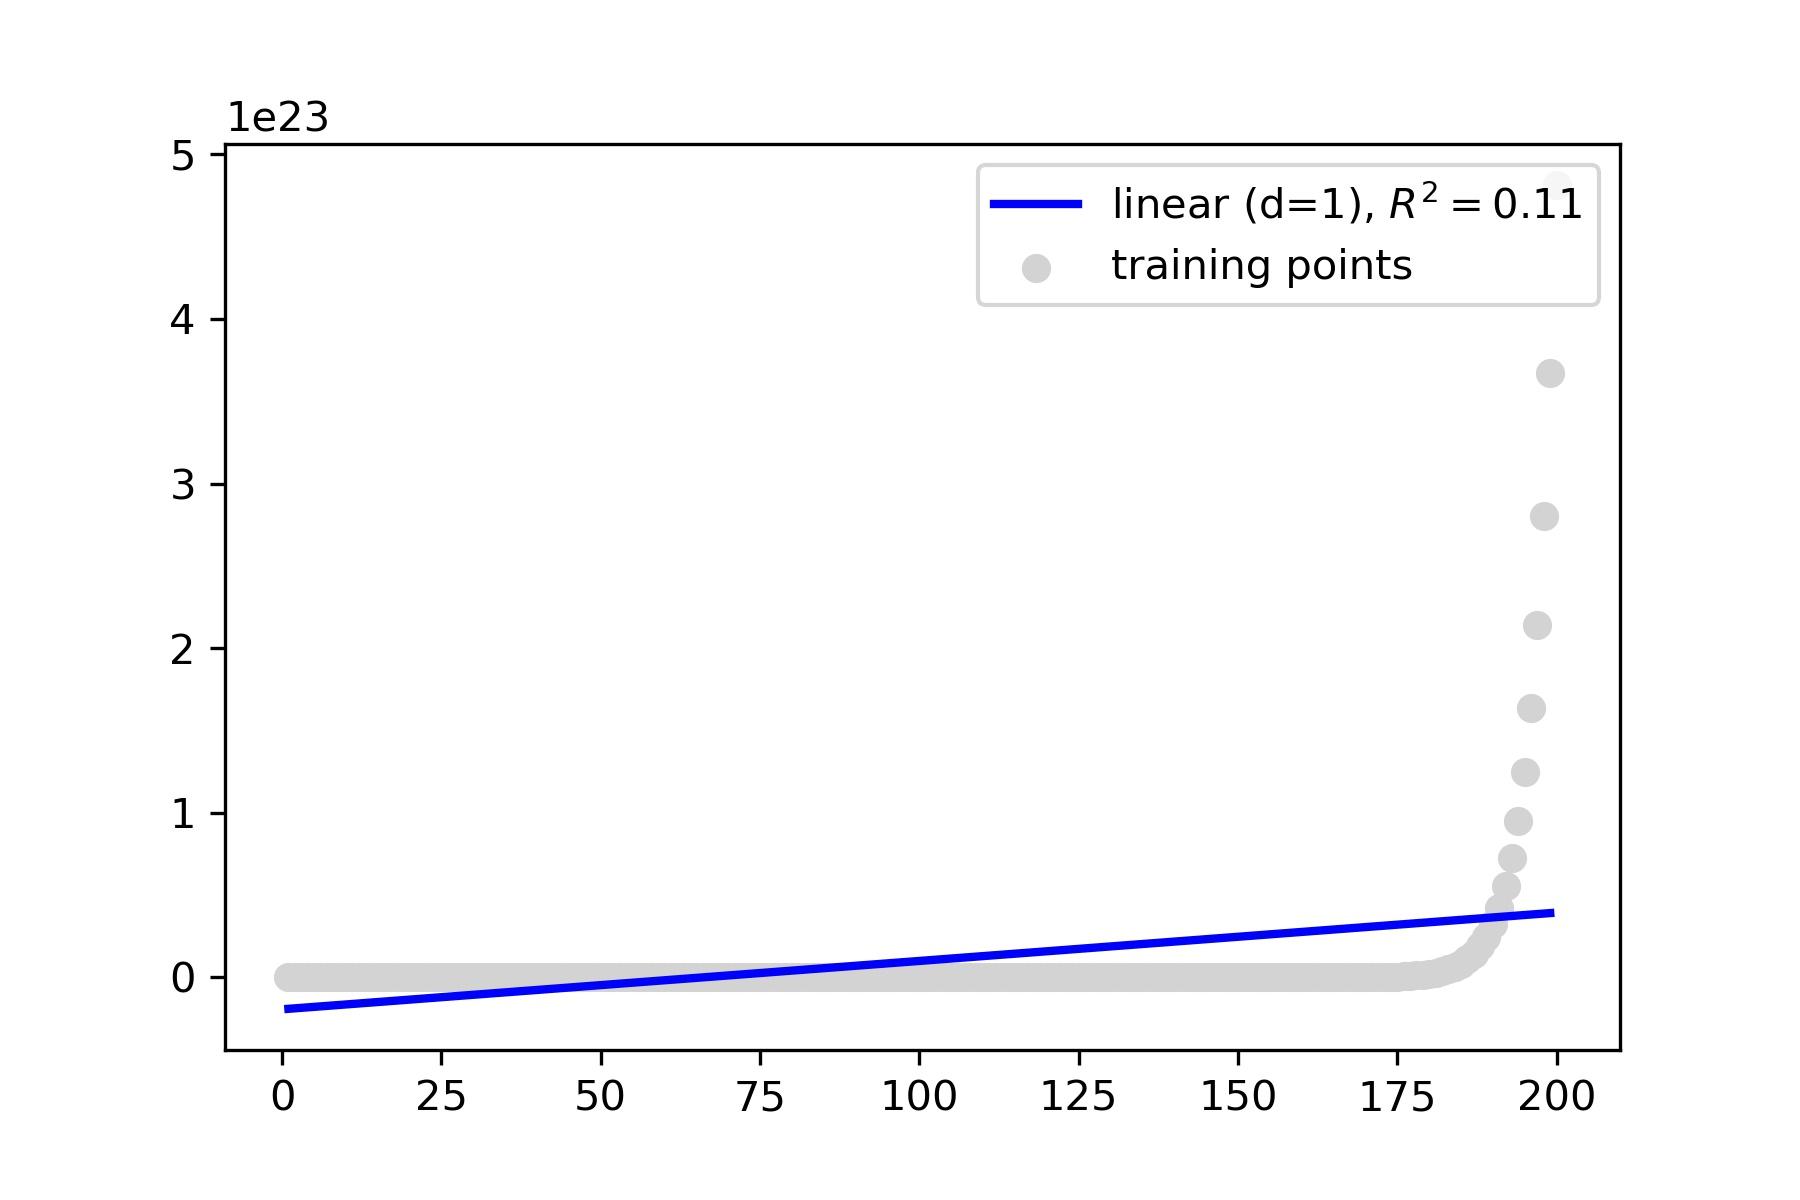

Регрессия с полиномиальным преобразованием второй степени:

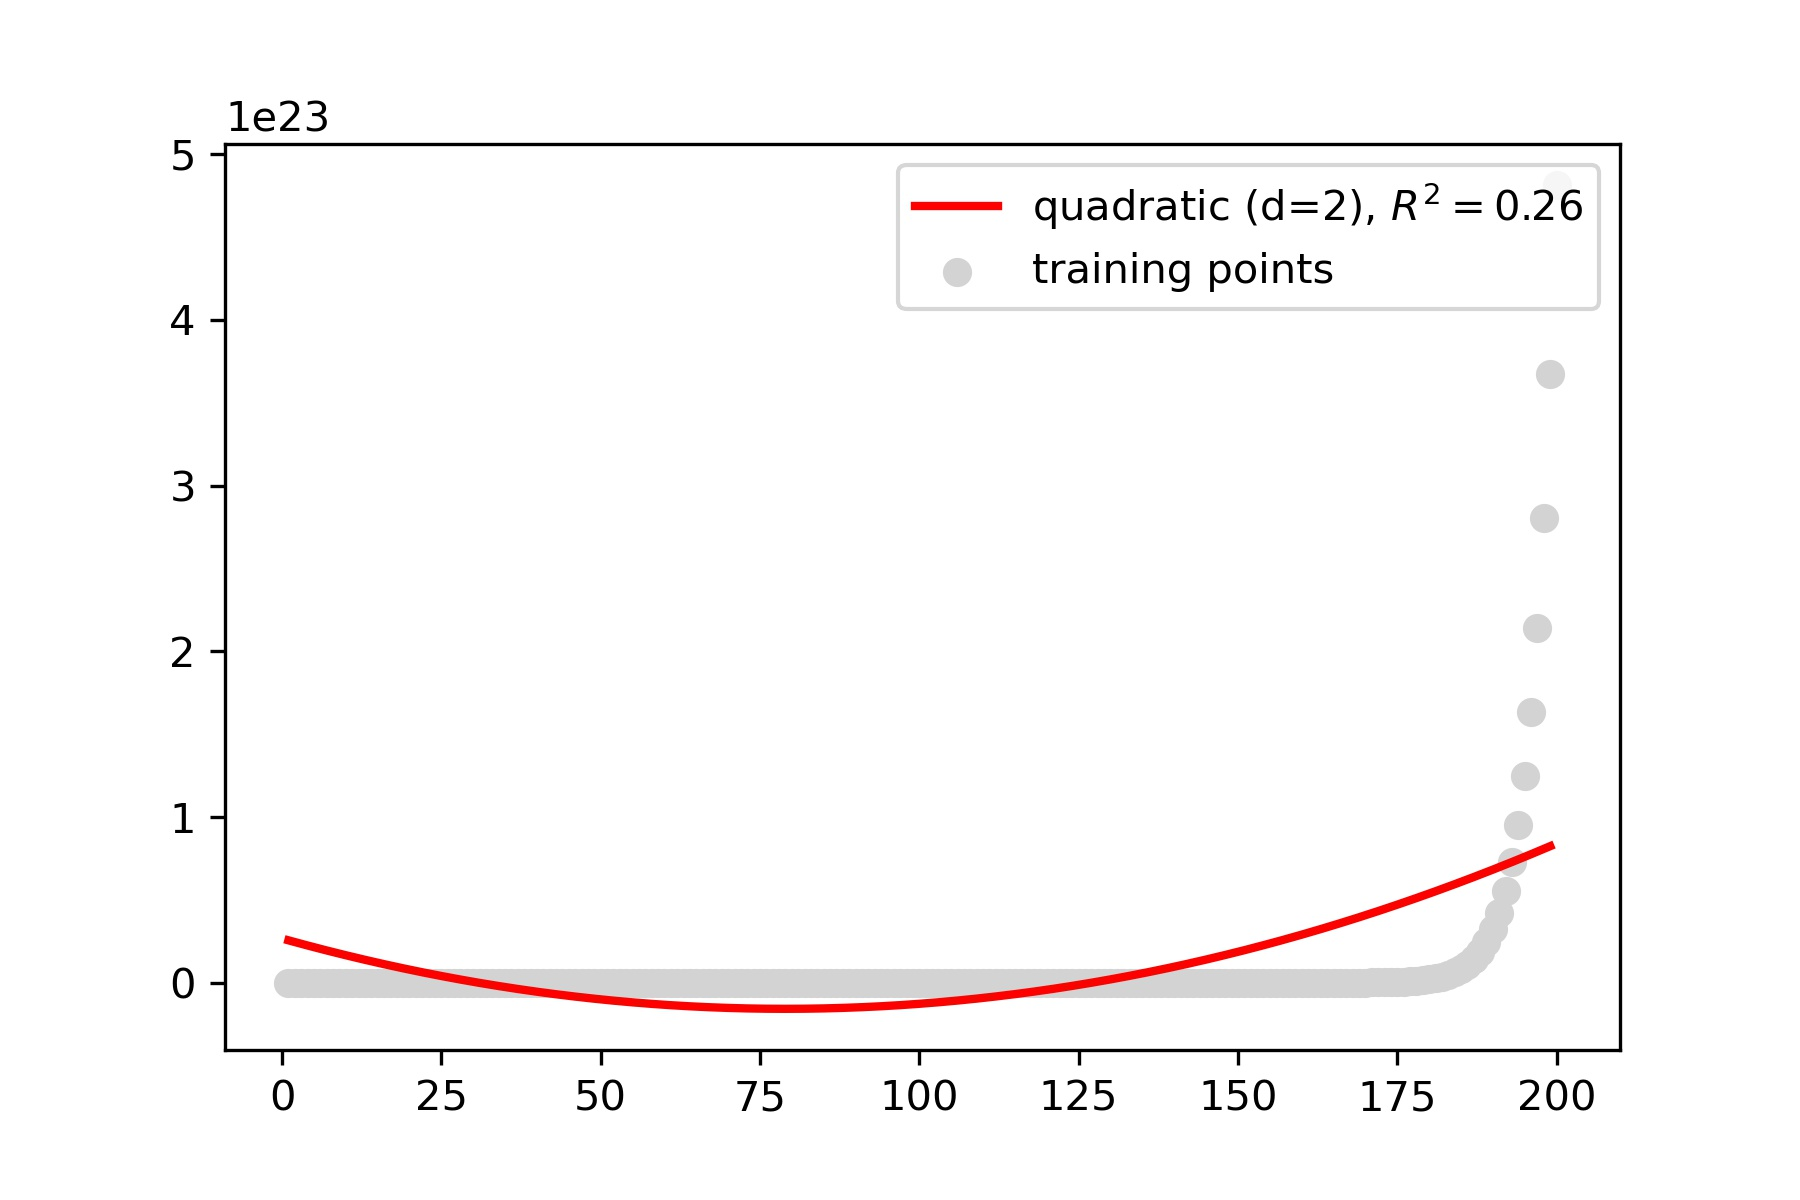

Регрессия с полиномиальным преобразованием третьей степени:

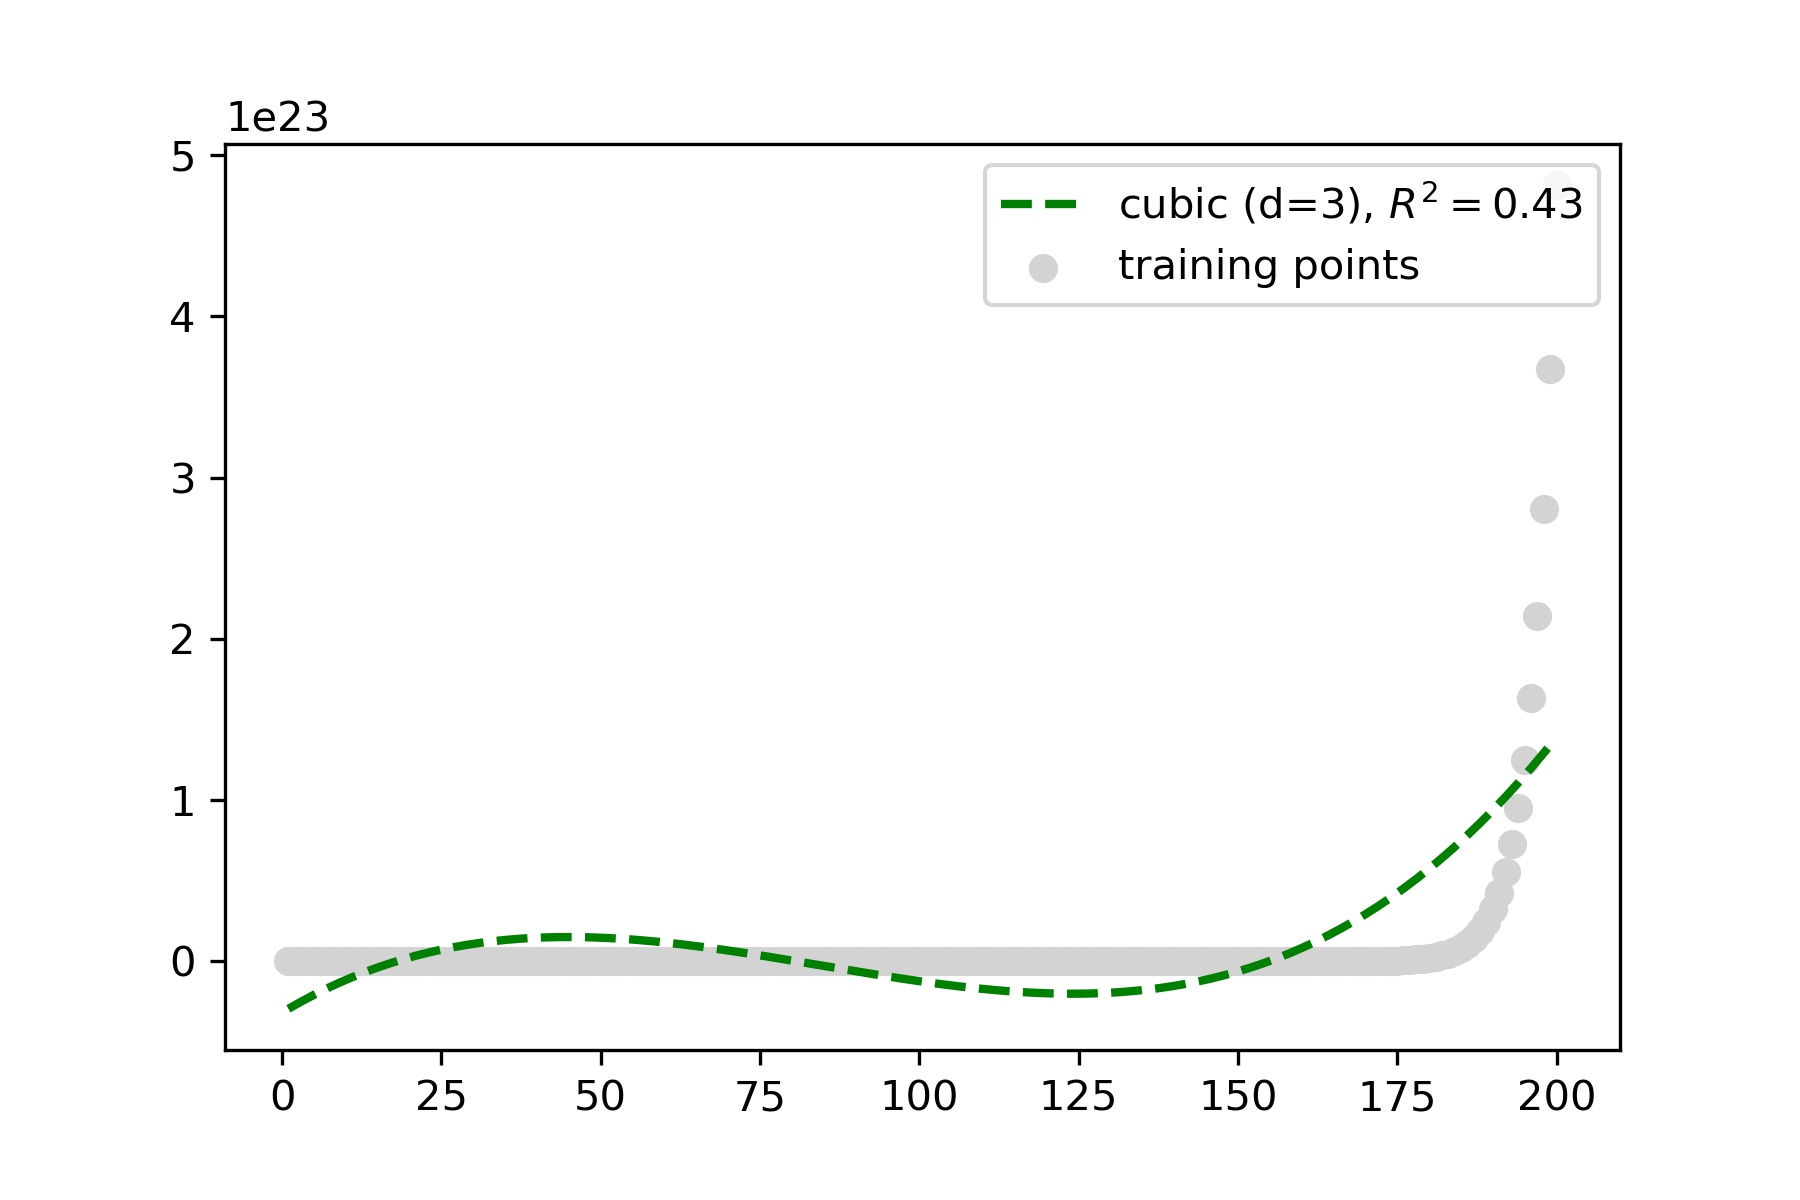

Регрессия с полиномиальным преобразованием четвертой степени:

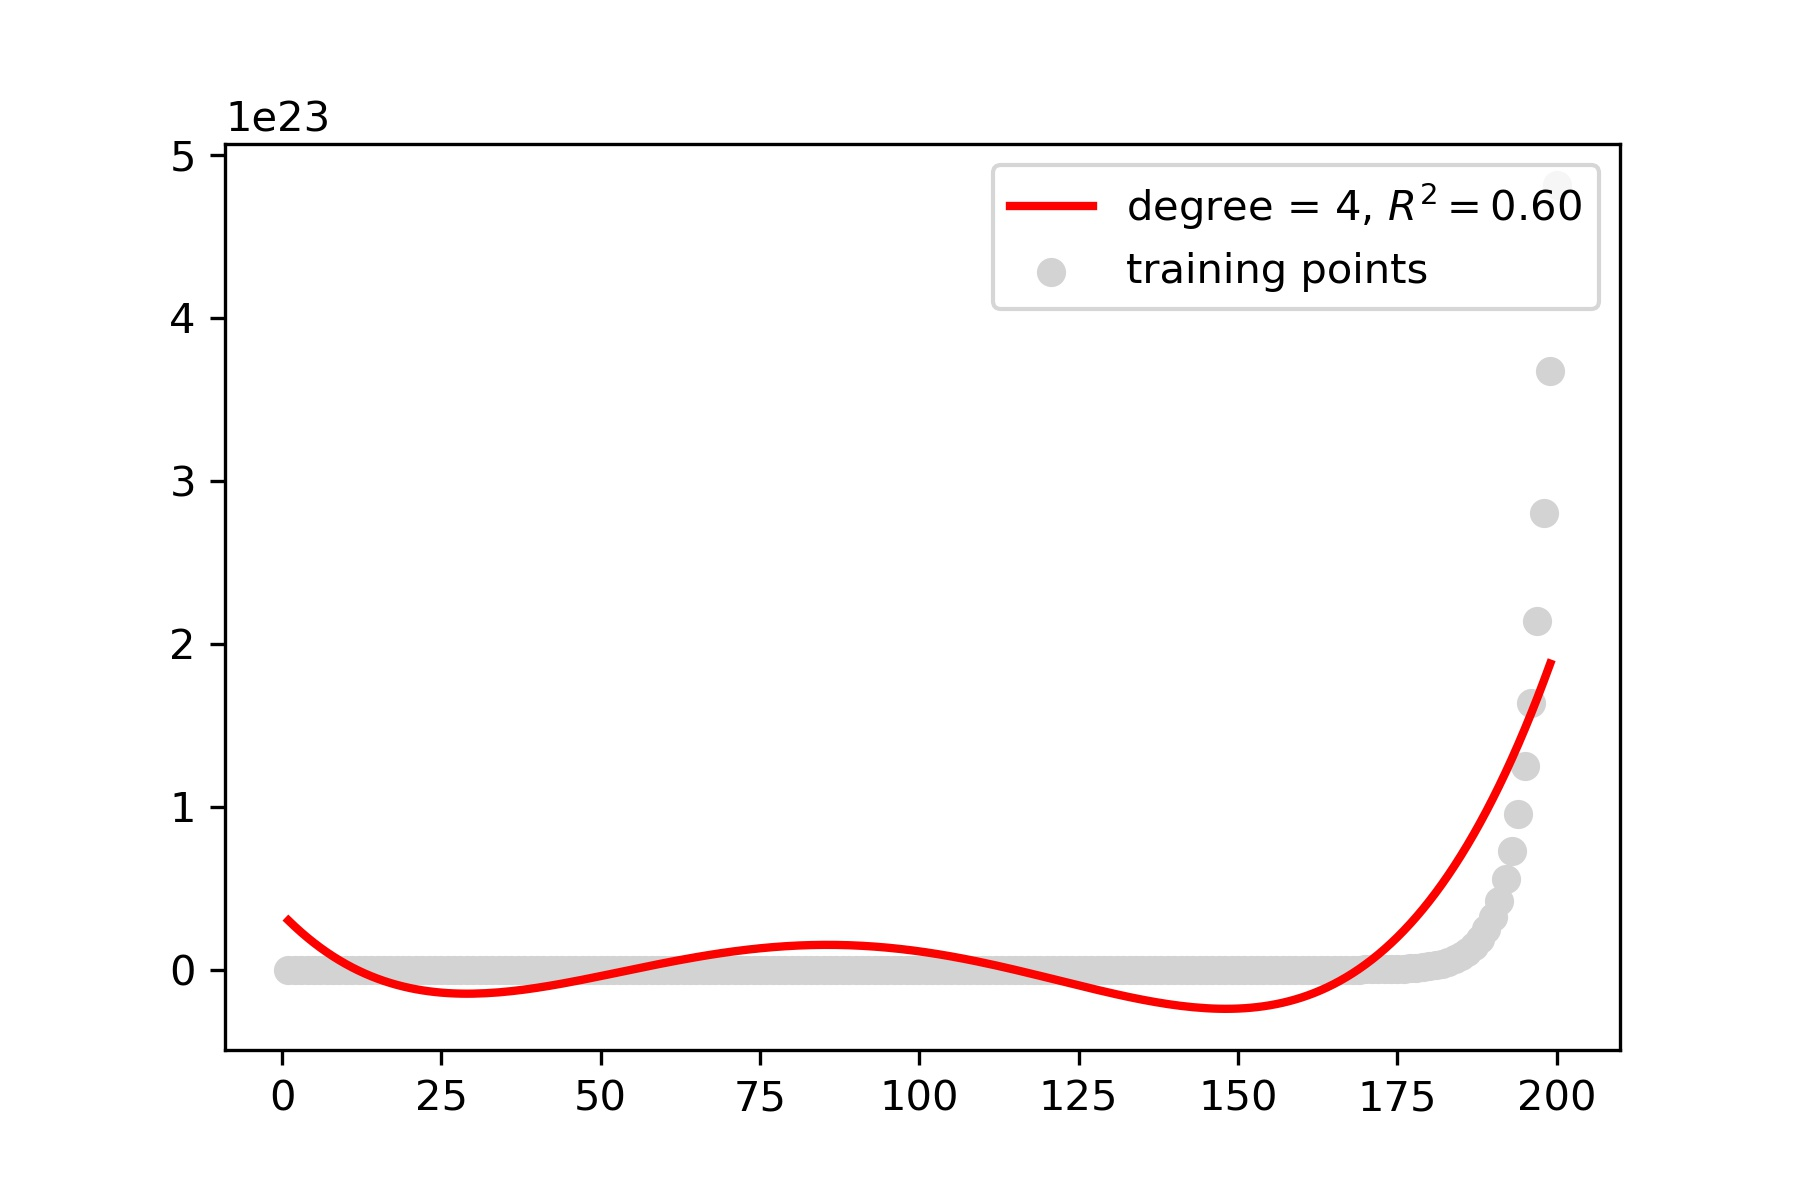

Регрессия с полиномиальным преобразованием пятой степени:

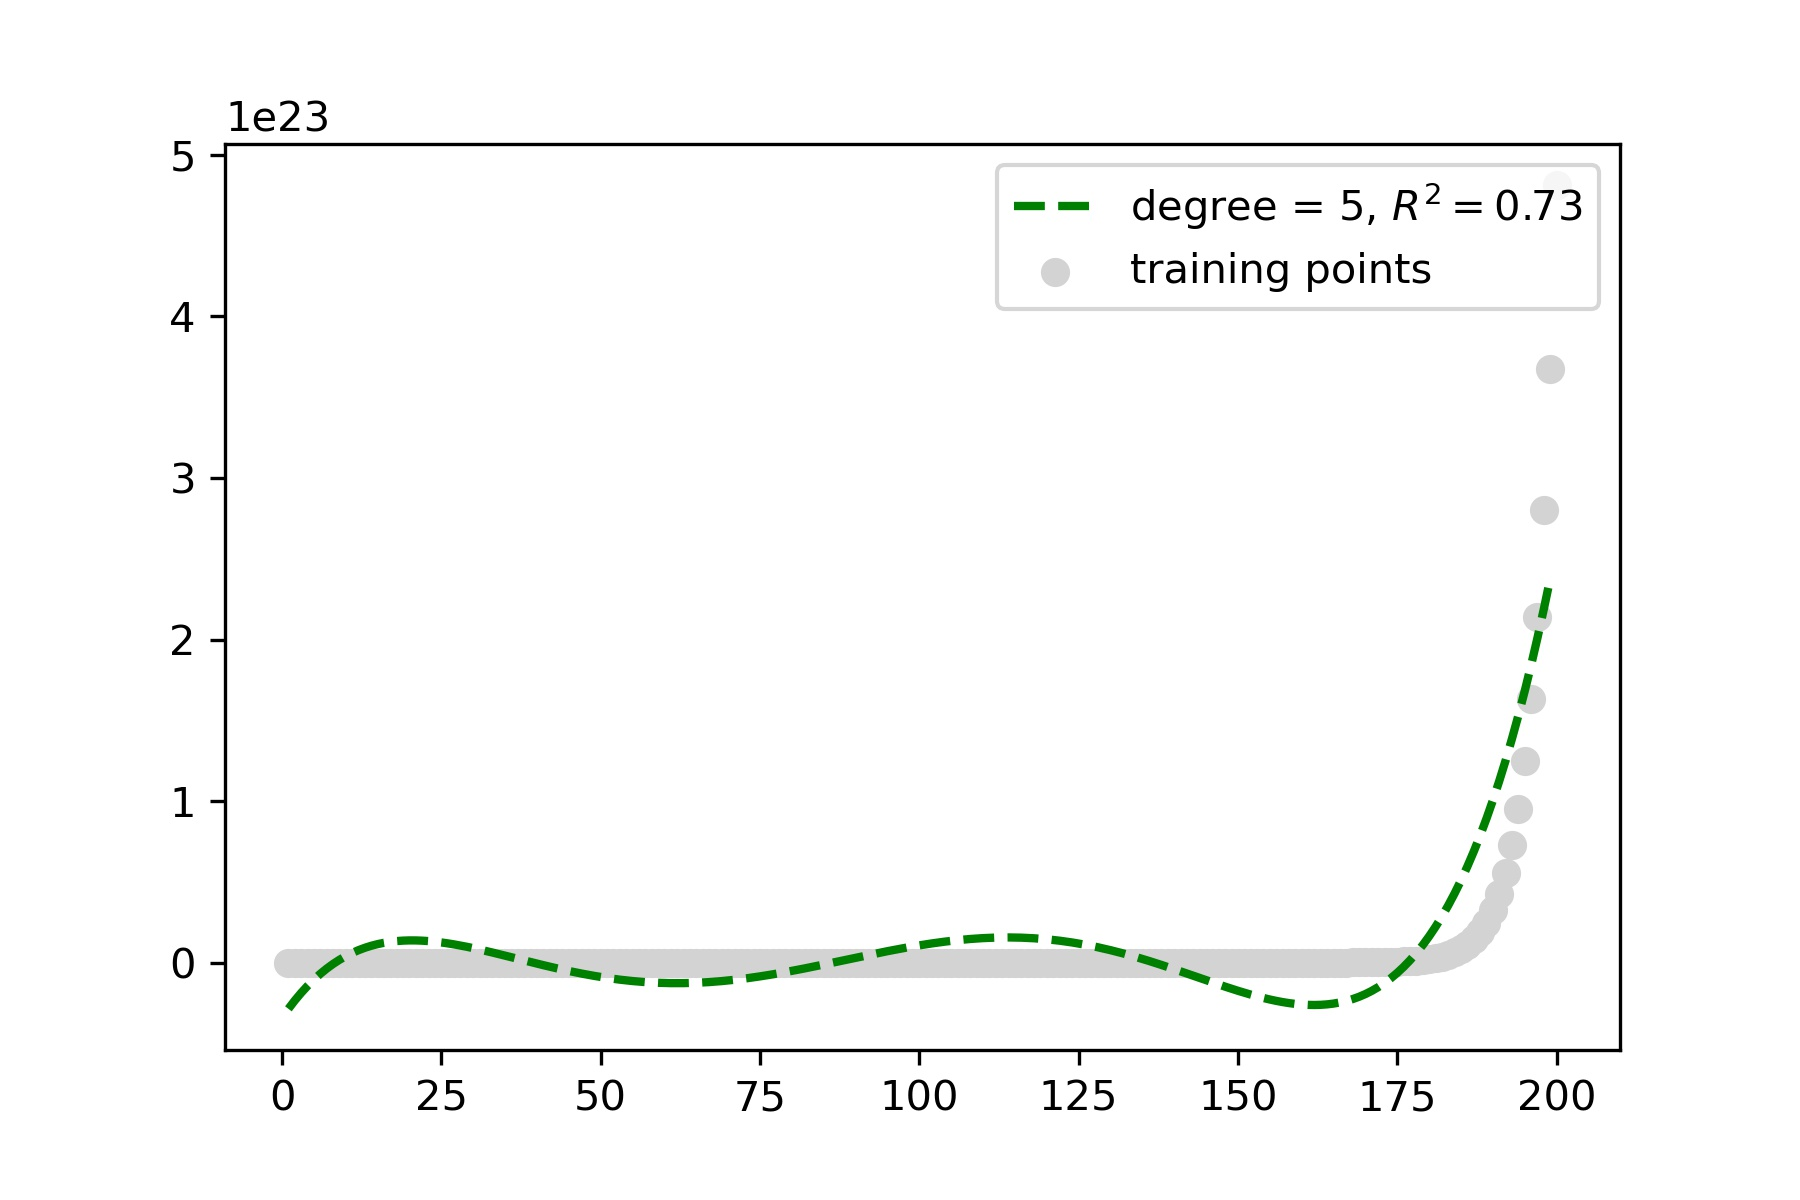

Регрессия с экспонентой:

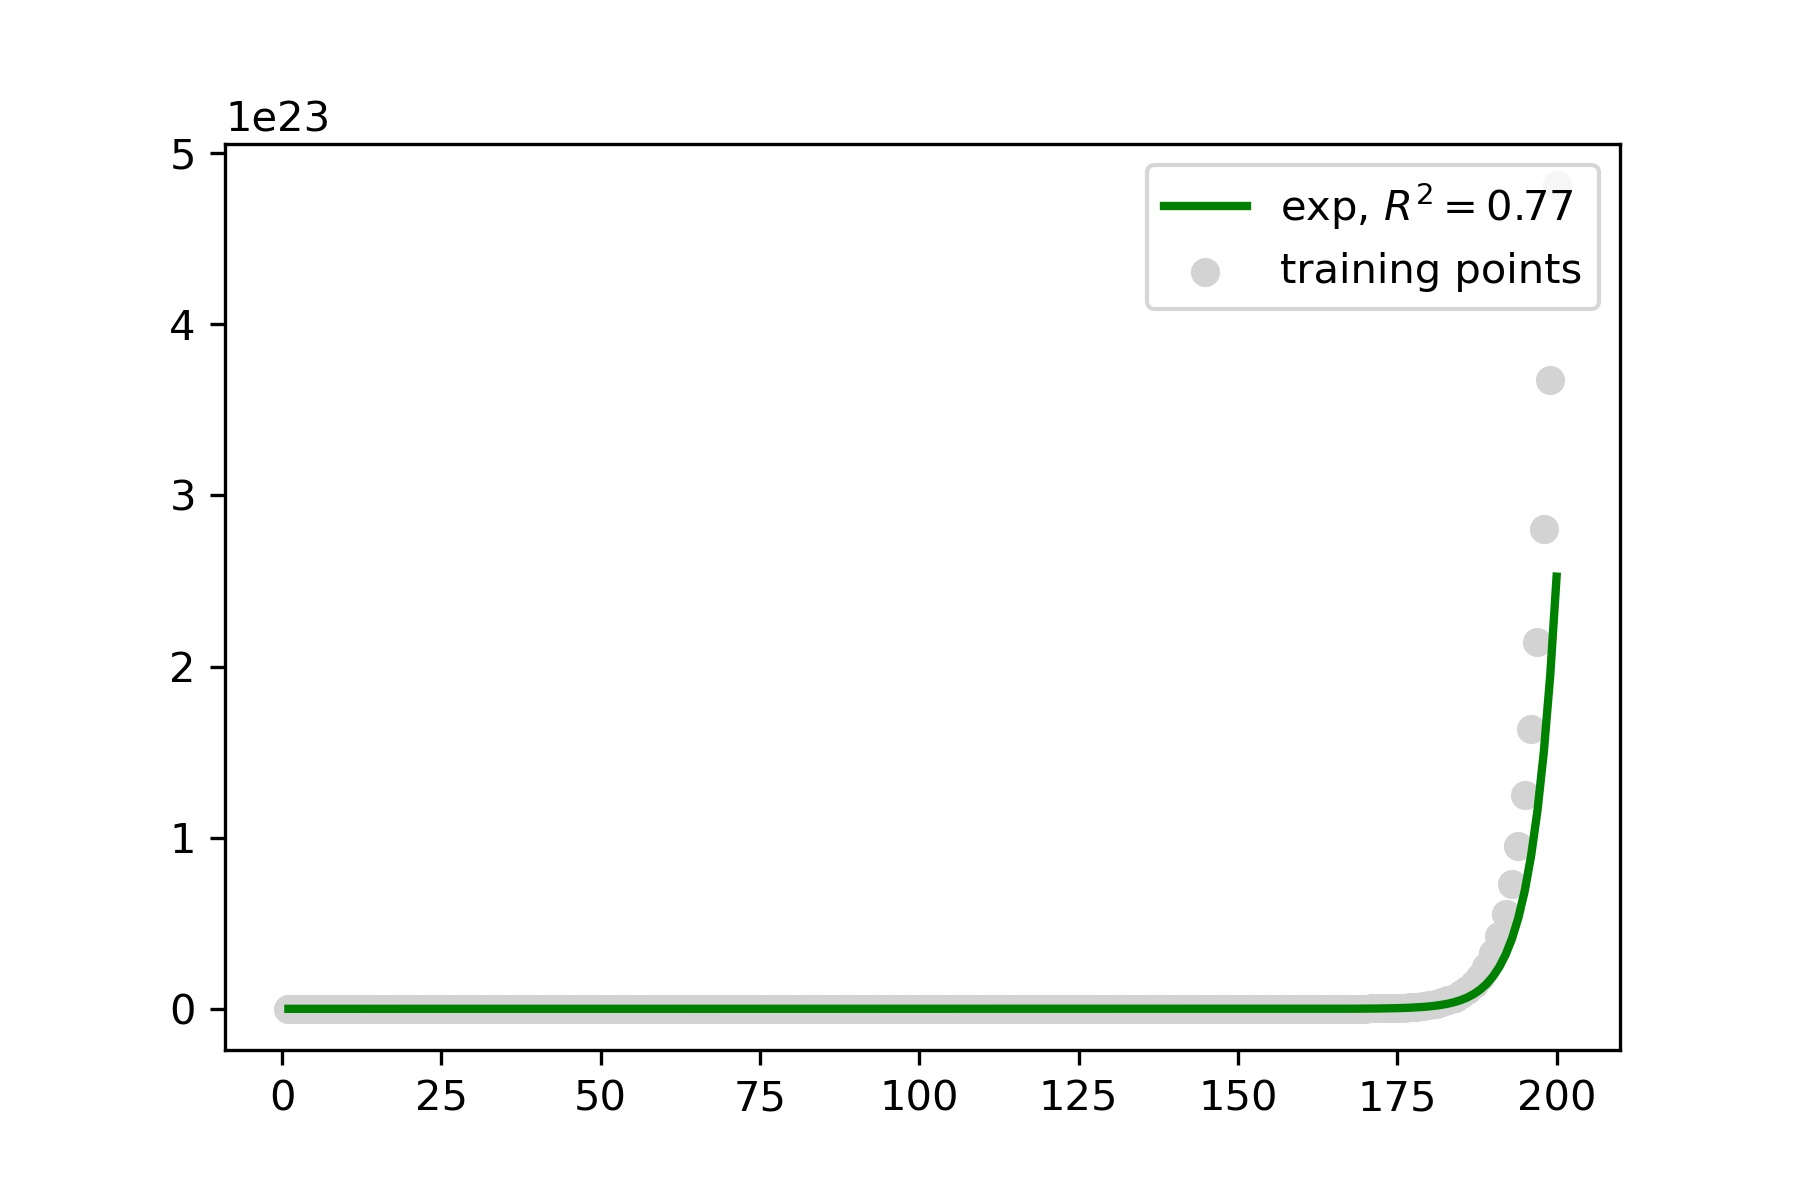

Собрав все воедино, получаем:

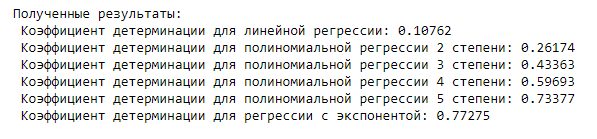

Как видим, с таким типом функций, как и ожидалось, лучше всего справляется регрессия с экспонентой.

# Вывод

Программа способна определить модель, которая лучше остальных из вышеперечисленных опишет данные. Путем выбора максимального полученного коэффициента детерминации можно выводить оптимальный вариант модели. Однако такой подход к выбору не учитывает варианты, когда сразу несколько моделей получают сопоставимые результаты. В таком случае следует выбирать либо самую простую модель, которая получила хороший результат, либо ту модель, которая по тем или иным соображениям лучше подойдет к данному исследованию.